# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them and find the best one that will help identify failures so that the generator could be repaired before failing/breaking and the overall maintenance cost of the generators can be brought down. 

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a wind turbine where there is no detection by model. 
- False positives (FP) are detections in a wind turbine where there is no failure. 

So, the maintenance cost associated with the model would be:

**Maintenance cost** = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
where,

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

Here the objective is to reduce the maintenance cost so, we want a metric that could reduce the maintenance cost.

- The minimum possible maintenance cost  =  `Actual failures*(Repair cost) = (TP + FN)*(Repair cost)`
- The maintenance cost associated with model = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`

So, we will try to maximize the ratio of minimum possible maintenance cost and the maintenance cost associated with the model.

The value of this ratio will lie between 0 and 1, the ratio will be 1 only when the maintenance cost associated with the model will be equal to the minimum possible maintenance cost.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import KNNImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

import os

In [2]:
os.getcwd()

'/Users/chydynma/Downloads'

In [3]:
ReneWind = pd.read_csv('/Users/chydynma/Downloads/Train.csv') # reading the Train dataset into the notebook
ReneWind.head() # view the first five rows of the dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


In [4]:
ReneWind.tail() # view the last five rows of the dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
39995,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
39996,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
39997,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0
39998,0.521,0.096,8.457,2.138,-1.636,-2.713,-2.693,-3.410,1.936,2.012,-4.989,-0.819,4.166,-1.192,-5.033,-8.523,-1.950,0.017,4.505,2.031,-8.849,0.566,-6.040,-0.043,1.656,4.250,1.727,-1.686,-3.963,-2.642,1.939,-1.257,-1.136,1.434,5.905,3.752,-1.867,-1.918,2.573,-5.019,0
39999,2.403,-1.336,6.451,-5.356,-0.434,0.255,-1.120,-2.523,-0.654,2.316,-2.862,0.199,1.593,-0.337,-0.709,-4.408,-3.683,2.973,-1.223,-1.958,-4.454,0.464,-4.952,-1.624,2.965,2.009,5.712,-2.910,-2.287,-3.676,5.678,-4.310,-0.709,-1.359,1.639,7.766,-0.245,-1.124,2.872,1.902,0


In [5]:
ReneWind_Test = pd.read_csv('/Users/chydynma/Downloads/Test.csv') # reading the Test dataset into the notebook
ReneWind_Test.head() # view the first five rows of the dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,-0.733,2.210,8.083,7.063,-1.510,-3.261,-3.334,-3.019,3.557,-1.511,-6.695,-1.937,0.141,-3.471,-4.233,-10.416,5.479,-0.023,6.036,6.603,-8.320,0.104,-6.879,1.457,2.110,3.381,-4.467,0.996,-1.409,-0.694,-2.577,-3.270,-1.806,1.798,5.895,-1.312,-0.765,-1.408,0.557,-4.049,0
2,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
3,3.412,1.153,2.114,-2.275,0.088,-0.010,0.514,-1.371,1.863,-0.031,-0.414,-1.567,3.184,0.864,-0.417,-0.996,-3.087,-0.648,-2.732,-2.056,-1.620,-0.091,-1.512,-3.892,1.646,3.147,4.442,-2.524,-2.434,-4.086,2.828,-2.497,-1.776,-1.712,-1.506,2.242,-0.658,-1.862,0.846,0.857,0
4,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0


In [6]:
# Setting the random seed through np.random.seed so as to get same result every time
# lets look at 10 random rows
ReneWind.sample(n=10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
33060,-6.949,-1.947,-0.616,7.307,0.768,-2.918,-3.423,1.898,2.550,-2.052,-5.634,-2.589,0.620,1.108,-4.673,-1.070,7.182,0.783,0.231,9.962,0.700,-1.210,0.824,0.989,-0.521,-2.120,-7.992,2.361,-1.162,1.212,-4.446,3.596,-2.078,1.885,-1.004,-1.256,1.900,-5.321,-0.001,-3.349,0
39746,-0.118,0.235,5.049,-2.208,0.150,-1.835,-1.770,1.387,0.365,-2.138,-1.854,2.310,5.012,-0.756,-4.325,-1.031,-1.268,1.588,-2.217,0.326,-5.028,-0.395,-0.915,-2.431,0.178,4.366,-1.318,-4.274,0.785,0.995,3.457,-0.217,1.387,-3.548,2.707,3.684,0.919,-5.745,0.997,1.578,0
10908,-0.430,3.473,3.228,-1.135,0.784,-0.004,0.231,-2.434,1.723,-3.278,-2.618,2.281,0.393,-2.967,-0.974,-4.362,3.141,2.316,-1.048,0.982,-1.760,-0.337,-2.978,-3.030,1.910,3.295,-0.394,-0.657,0.045,-3.197,-2.554,-9.324,-3.222,-0.053,-3.429,1.550,2.634,2.066,2.321,3.127,0
2883,2.717,0.883,9.779,-1.966,-1.878,-0.581,-1.294,-6.204,1.772,2.682,-3.355,-0.788,3.407,-1.979,-2.465,-9.401,-4.497,0.638,3.202,-1.038,-7.872,-0.071,-9.521,-3.371,3.386,4.849,6.875,-2.469,-3.611,-5.610,2.817,-8.436,-2.010,1.812,3.180,6.045,-1.502,1.439,4.265,-2.290,0
2936,-1.921,2.000,1.393,10.534,-3.050,-1.653,-3.408,-5.102,5.481,-1.679,-1.129,-3.270,2.590,-3.204,-8.107,-11.678,3.076,-1.355,8.686,5.707,-9.070,2.299,-2.392,2.215,-2.160,1.645,-6.395,2.778,0.258,4.747,-10.820,0.899,2.107,2.764,7.801,-9.579,-1.767,2.464,-1.043,-9.901,0
8347,2.122,-0.053,6.328,-1.589,-1.179,-0.918,-1.261,-1.756,-0.006,1.351,-1.765,0.359,2.160,-1.156,-1.757,-4.358,-2.838,0.530,1.759,-1.075,-5.839,0.287,-4.426,-0.515,1.444,3.055,2.588,-2.381,-0.964,-0.995,3.770,-1.755,0.757,-0.737,4.600,3.628,-1.295,-1.370,1.365,-0.746,0
12497,-6.892,-4.777,-4.746,3.267,-1.062,-0.013,-0.799,1.883,-1.345,1.801,2.456,-0.071,-0.408,2.153,-0.578,4.881,0.473,-1.368,2.393,4.973,5.514,-2.005,1.505,-0.119,-2.716,-6.361,-2.713,3.103,2.046,4.198,-4.979,2.885,1.102,5.408,-1.283,-1.699,1.113,-0.004,0.517,-4.158,1
18228,0.715,1.091,-1.096,2.990,-0.288,-0.085,-1.389,-0.210,0.648,-1.416,-0.008,-0.591,-1.046,-1.678,-2.547,-3.739,2.226,1.118,2.129,-0.074,-4.161,2.695,2.582,4.970,-1.714,0.404,-4.949,0.843,1.541,4.751,-2.354,5.188,3.619,-2.681,5.366,-5.066,-1.079,0.678,-2.732,-1.614,0
27063,-0.010,-2.098,0.204,-3.237,-0.062,-1.842,-0.111,4.019,-2.428,-0.501,-2.628,5.887,0.853,0.475,-0.584,1.140,1.937,2.912,-0.768,1.449,-1.727,2.288,4.557,1.686,0.645,-2.019,-0.614,-0.767,-1.031,0.863,1.325,1.185,-2.567,-0.910,0.802,4.058,2.332,-3.468,0.384,2.530,0
1586,0.819,-0.264,2.933,-1.379,0.219,-0.058,-1.260,-1.952,0.519,1.038,-2.477,-0.986,1.286,-0.159,-2.050,-3.953,-1.404,2.019,-0.591,-0.760,-3.456,0.998,-1.741,0.536,1.036,1.751,1.655,-1.290,-2.143,-1.813,2.278,-0.075,0.058,-1.425,1.463,3.107,-0.534,-0.555,1.213,-0.278,0


In [7]:
# Understanding the shape of the dataset
print(ReneWind.shape)
print(ReneWind_Test.shape)

(40000, 41)
(10000, 41)


* 40,000 rows with 41 columns in the training set and 10,000 rows with 41 columns in the testing set.

In [8]:
# let's check the data types of the columns in the dataset
print(ReneWind.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

* There are null values in V1 and V2 in the train set i.e. column have missing values. We'll explore this further.
* All columns are floats.

In [9]:
# let's check for duplicate values in the data
ReneWind.duplicated().sum()

0

* There are no duplicates in the train dataset.

In [10]:
# let's check for missing values in the data
round(ReneWind.isnull().sum() / ReneWind.isnull().count() * 100, 2)

V1       0.120
V2       0.100
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

* V1 and V2 have 0.12% and 0.1% respectively.

In [11]:
# Checking for the null value in the dataset
ReneWind.isna().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [12]:
ReneWind.nunique()

V1        39954
V2        39961
V3        40000
V4        40000
V5        40000
V6        40000
V7        40000
V8        40000
V9        40000
V10       40000
V11       40000
V12       40000
V13       40000
V14       40000
V15       39999
V16       40000
V17       40000
V18       40000
V19       40000
V20       40000
V21       40000
V22       40000
V23       40000
V24       40000
V25       40000
V26       40000
V27       40000
V28       40000
V29       40000
V30       40000
V31       40000
V32       40000
V33       40000
V34       40000
V35       40000
V36       40000
V37       40000
V38       40000
V39       40000
V40       40000
Target        2
dtype: int64

In [13]:
ReneWind_Test.isna().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

* V1 has 11 missing values while V2 has 7.

In [14]:
# let's check for missing values in the Test data
round(ReneWind_Test.isnull().sum() / ReneWind_Test.isnull().count() * 100, 2)

V1       0.110
V2       0.070
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

* V1 and V2 have 11% and 7% of missing values respectively 

In [15]:
# let's view the statistical summary of the numerical columns in the data
ReneWind.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


* V3 has the highest mean of 2.5 amongst the various columns while V37 had the lowest with -0.000
* V3 has a wide range of -11.469 to 18.366

In [16]:
# Printing number of count of each unique value in each column
print("Number of samples for Target 0 are : ",len(ReneWind[ReneWind['Target']==0]))
print("Number of samples for Target 1 are : ",len(ReneWind[ReneWind['Target']==1]))

Number of samples for Target 0 are :  37813
Number of samples for Target 1 are :  2187


* There are 37,813 not failed(0) and 2,187 are failed(1) generator of wind turbines using sensors.

In [17]:
# Add all column names to a list except for the target variable
columns=ReneWind.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

Column names except for the target column are : ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40']


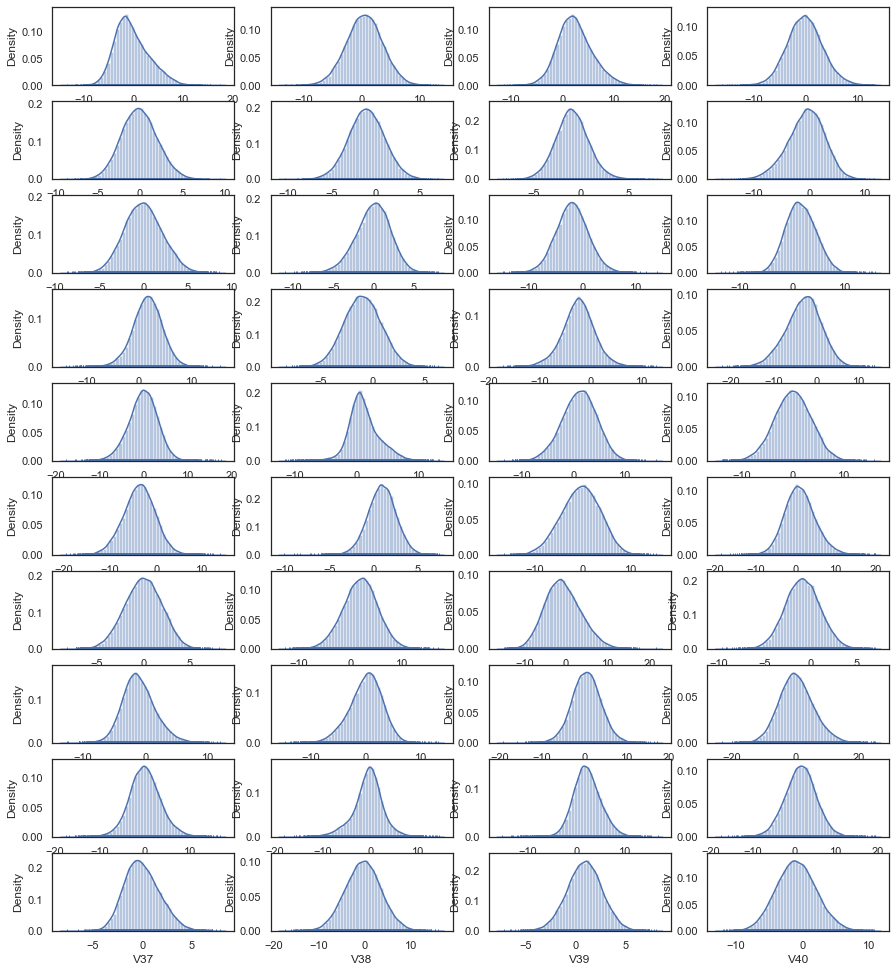

In [18]:
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(10,4,i+1)
    sns.distplot(ReneWind[columns[i]], hist=True, rug=True)

* Here is a summary of the distribution for each variable. We can see there is a balance (50/50) between normally distributed and skwed variables. 
* Let's deep dive into each column.

## EDA 

### Univariate

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

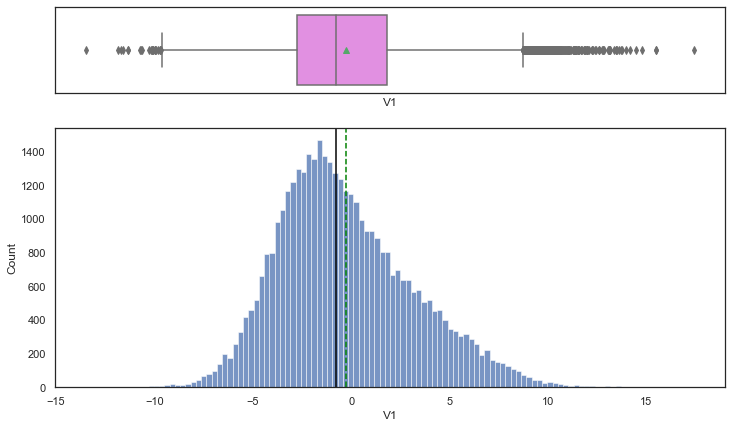

In [20]:
# Observations on V1
histogram_boxplot(ReneWind, "V1")

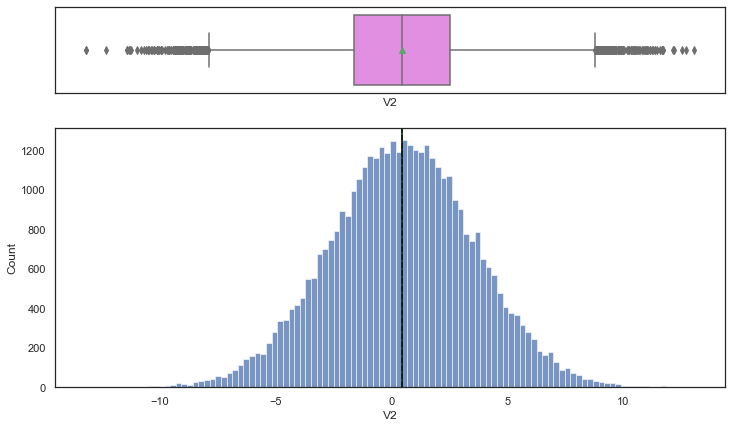

In [21]:
# Observations on V2
histogram_boxplot(ReneWind, "V2")

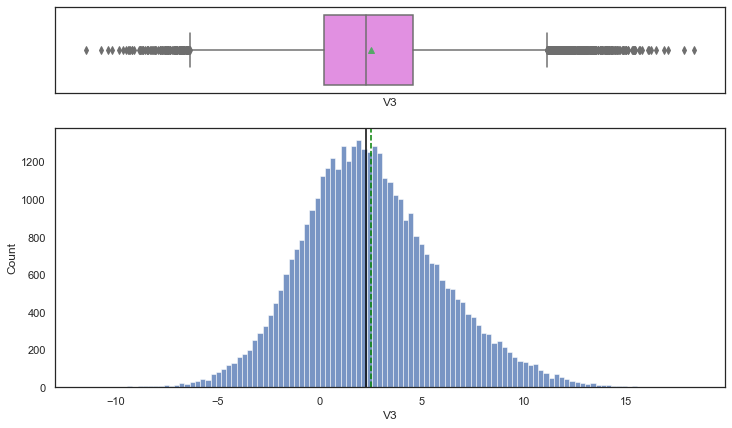

In [22]:
# Observations on V3
histogram_boxplot(ReneWind, "V3")

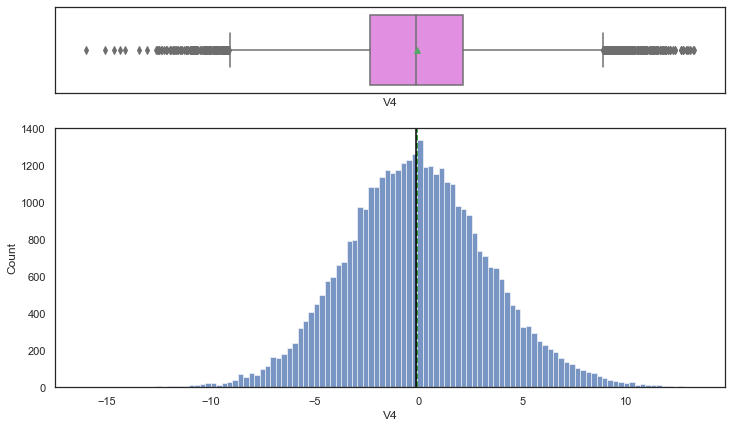

In [23]:
# Observations on V4
histogram_boxplot(ReneWind, "V4")

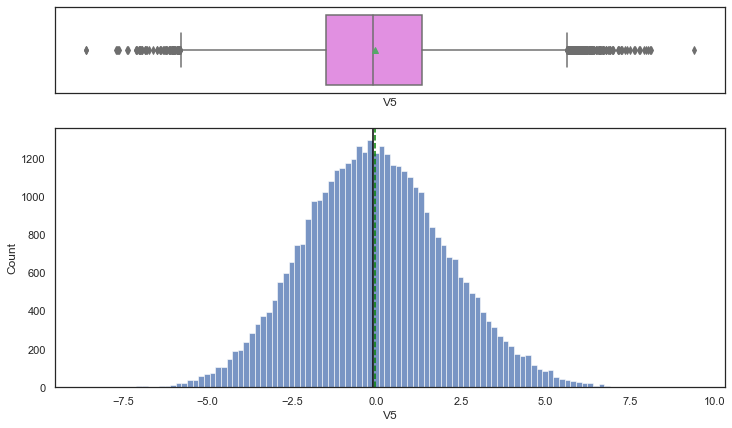

In [24]:
# Observations on V5
histogram_boxplot(ReneWind, "V5")

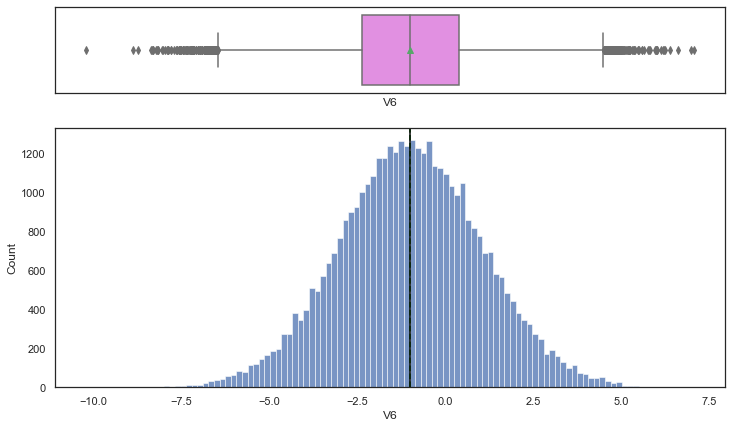

In [25]:
# Observations on V6
histogram_boxplot(ReneWind, "V6")

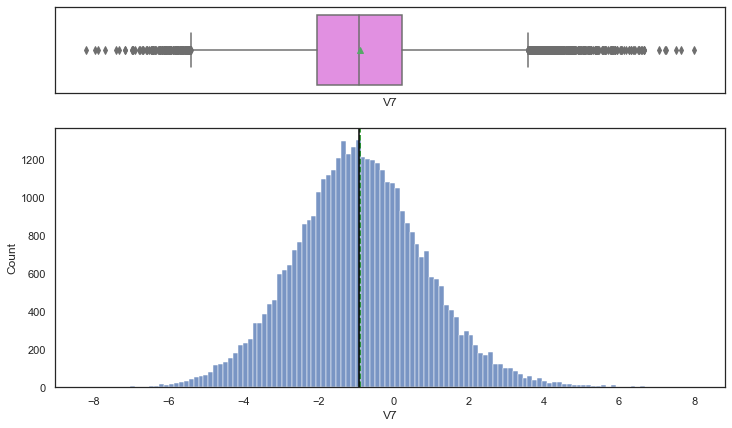

In [26]:
# Observations on V7
histogram_boxplot(ReneWind, "V7")

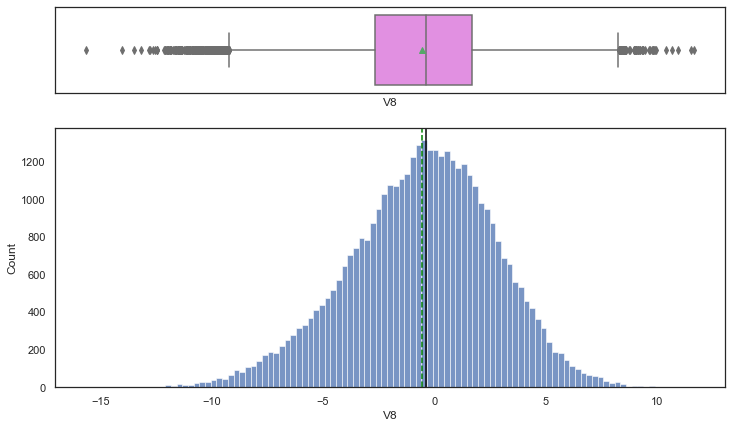

In [27]:
# Observations on V8
histogram_boxplot(ReneWind, "V8")

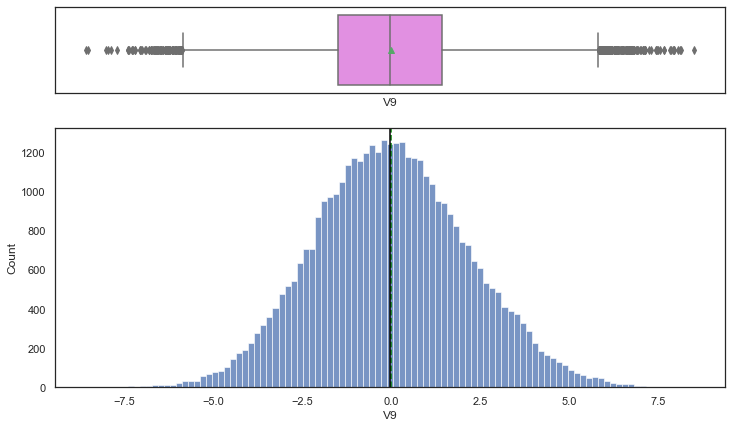

In [28]:
# Observations on V9
histogram_boxplot(ReneWind, "V9")

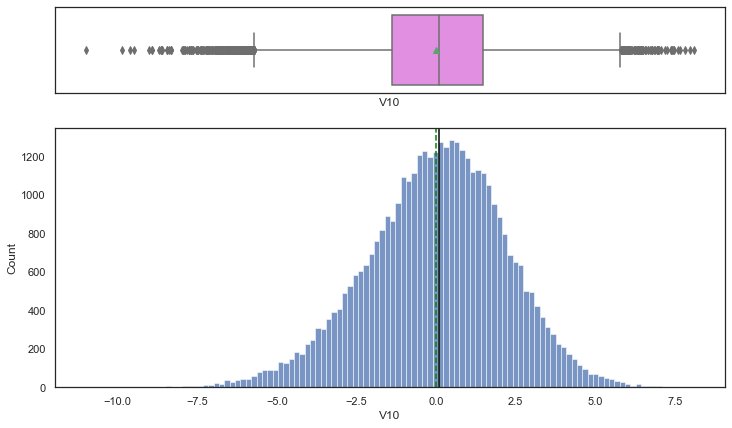

In [29]:
# Observations on V10
histogram_boxplot(ReneWind, "V10")

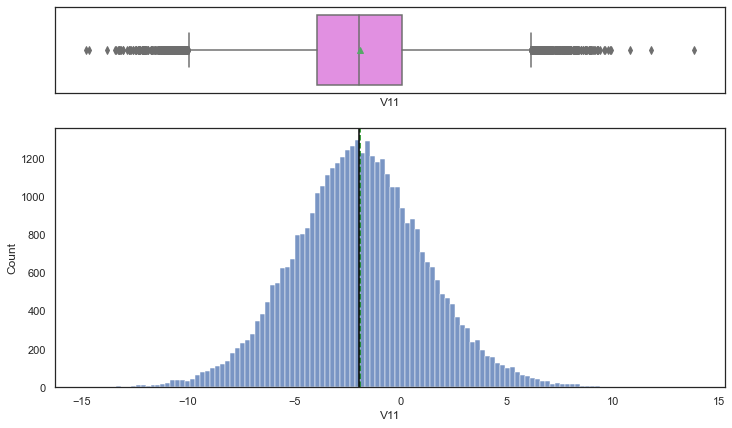

In [30]:
# Observations on V11
histogram_boxplot(ReneWind, "V11")

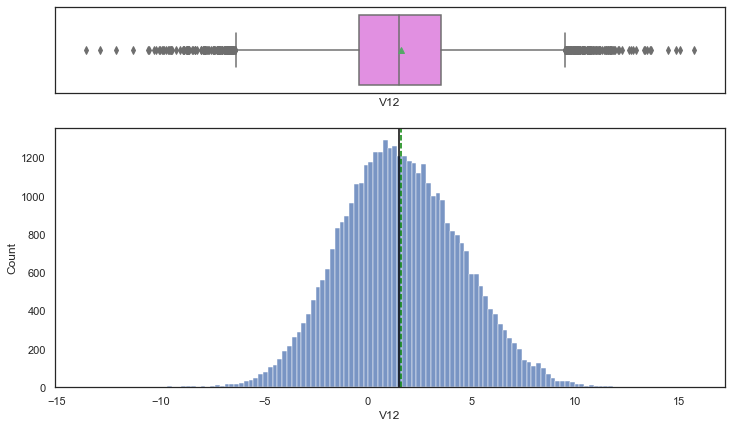

In [31]:
# Observations on V12
histogram_boxplot(ReneWind, "V12")

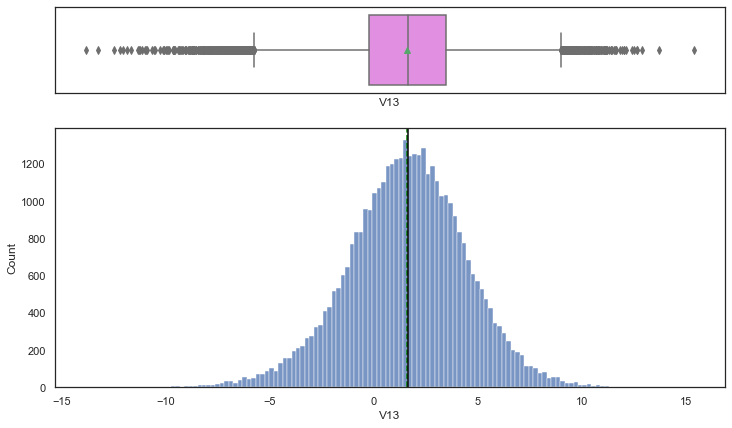

In [32]:
# Observations on V13
histogram_boxplot(ReneWind, "V13")

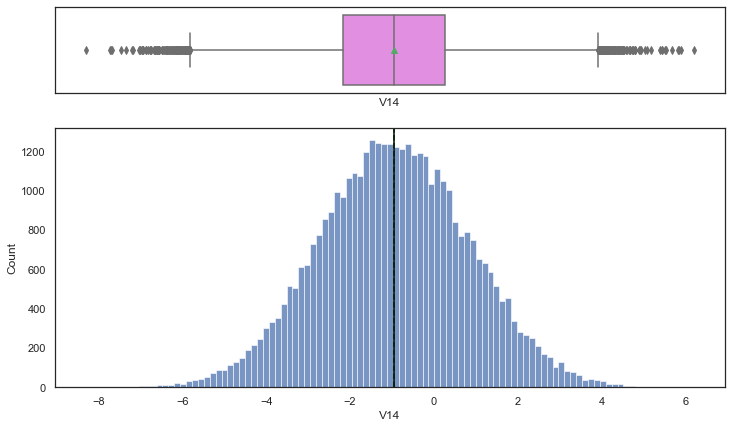

In [33]:
# Observations on V14
histogram_boxplot(ReneWind, "V14")

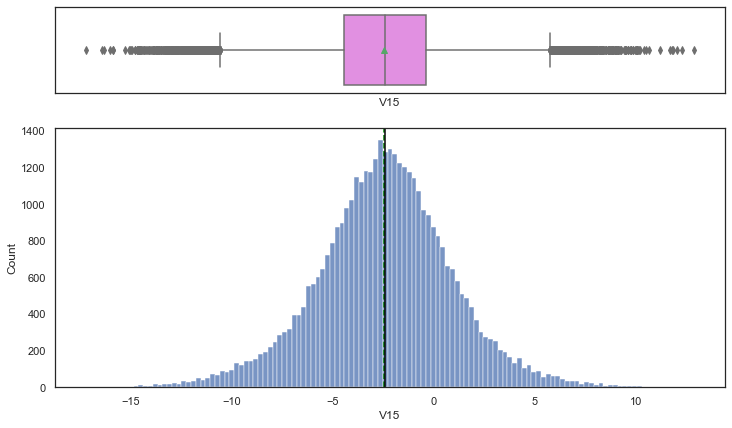

In [34]:
# Observations on V15
histogram_boxplot(ReneWind, "V15")

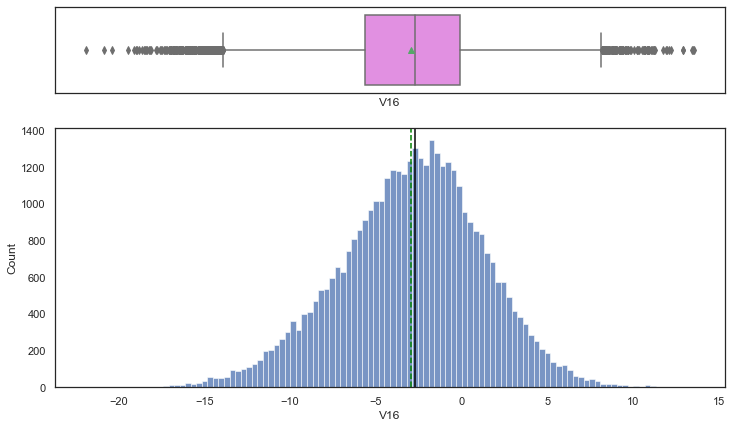

In [35]:
# Observations on V16
histogram_boxplot(ReneWind, "V16")

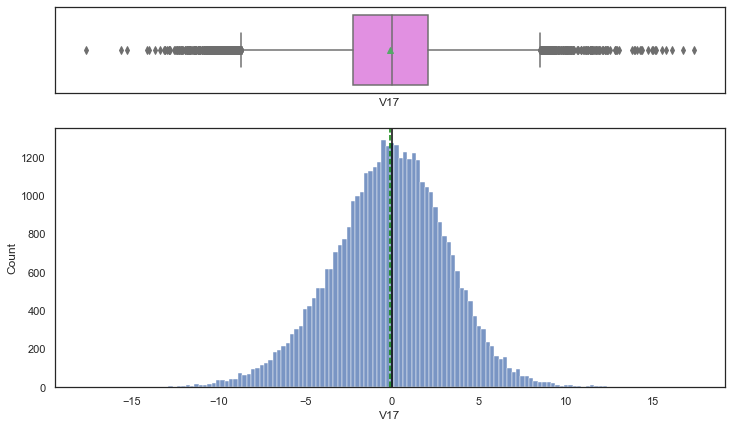

In [36]:
# Observations on V17
histogram_boxplot(ReneWind, "V17")

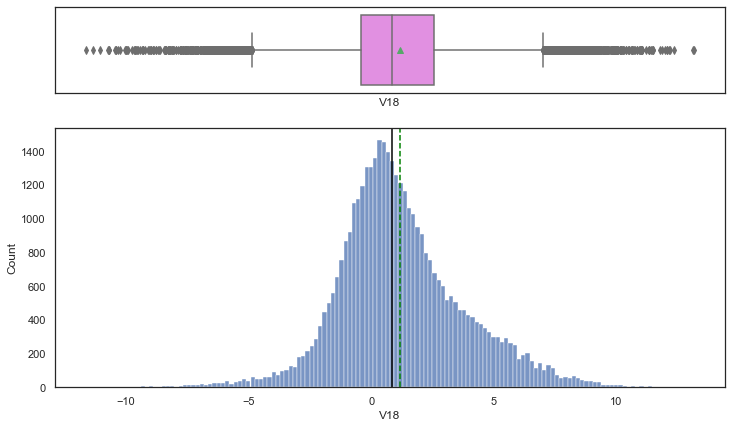

In [37]:
# Observations on V18
histogram_boxplot(ReneWind, "V18")

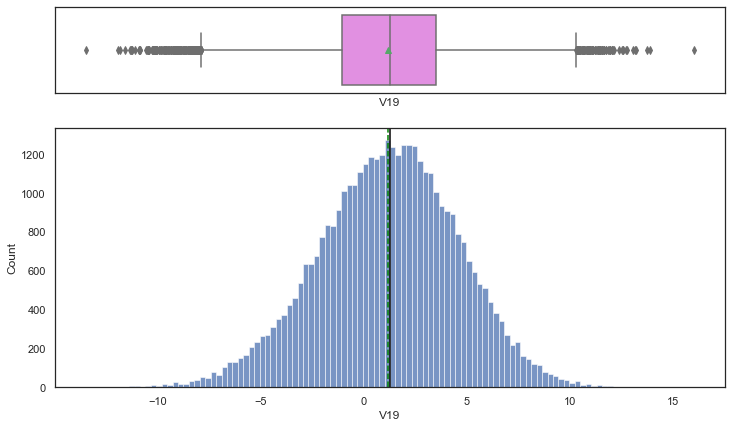

In [38]:
# Observations on V19
histogram_boxplot(ReneWind, "V19")

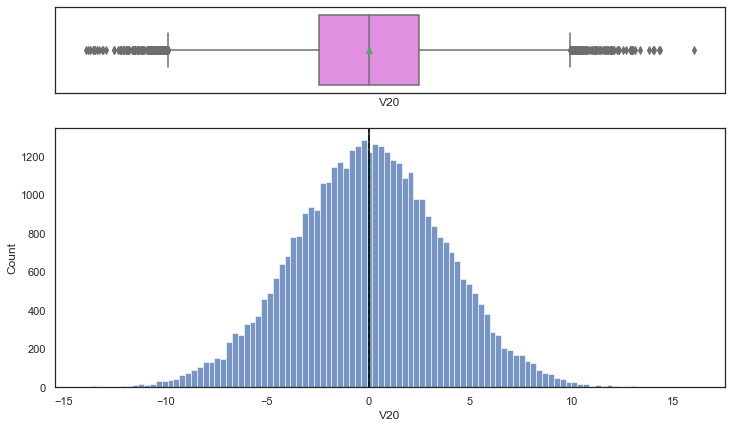

In [39]:
# Observations on V20
histogram_boxplot(ReneWind, "V20")

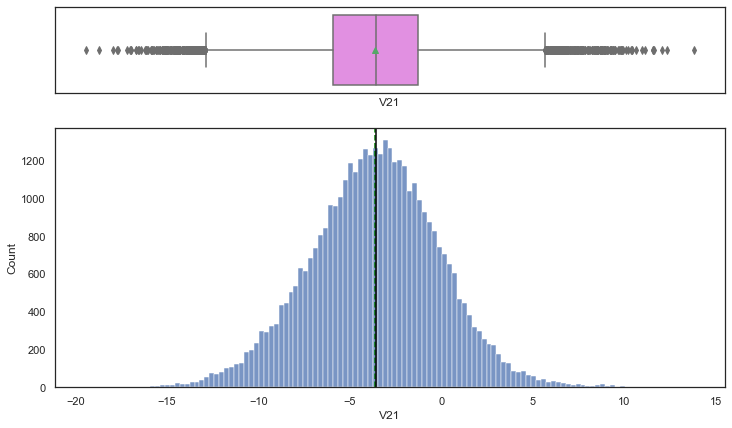

In [40]:
# Observations on V21
histogram_boxplot(ReneWind, "V21")

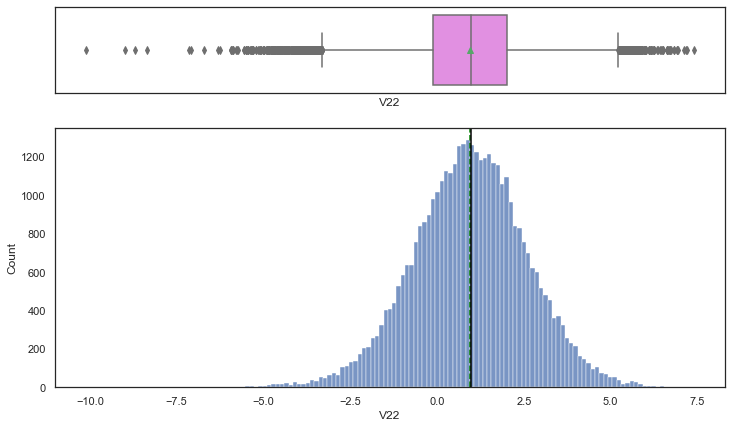

In [41]:
# Observations on V22
histogram_boxplot(ReneWind, "V22")

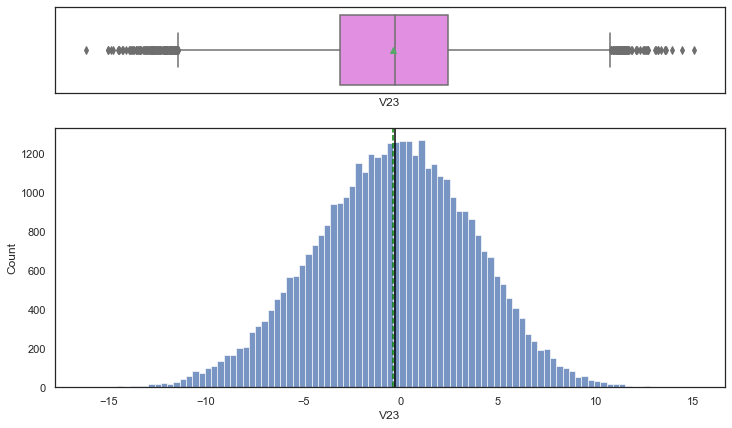

In [42]:
# Observations on V23
histogram_boxplot(ReneWind, "V23")

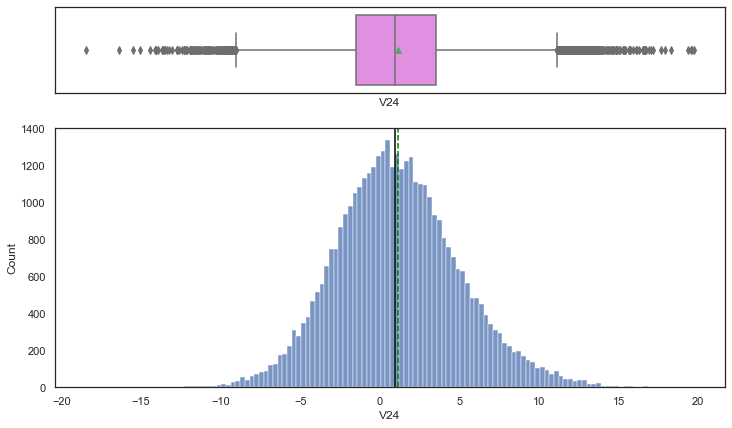

In [43]:
# Observations on V24
histogram_boxplot(ReneWind, "V24")

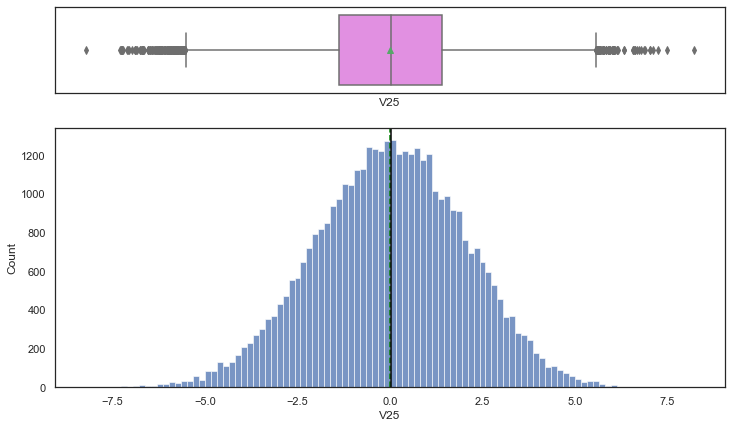

In [44]:
# Observations on V25
histogram_boxplot(ReneWind, "V25")

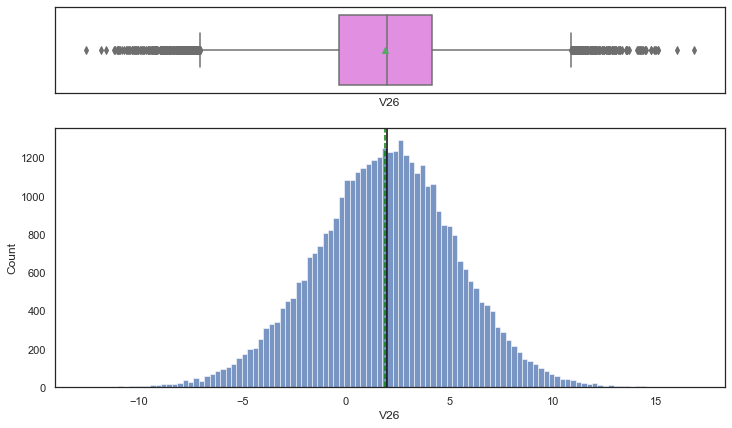

In [45]:
# Observations on V26
histogram_boxplot(ReneWind, "V26")

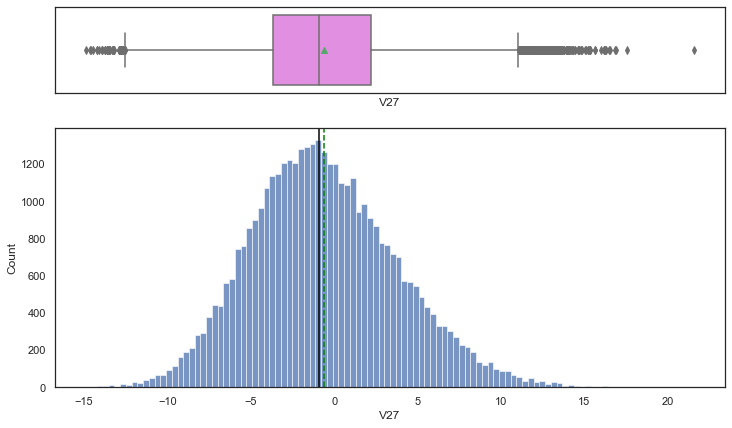

In [46]:
# Observations on V27
histogram_boxplot(ReneWind, "V27")

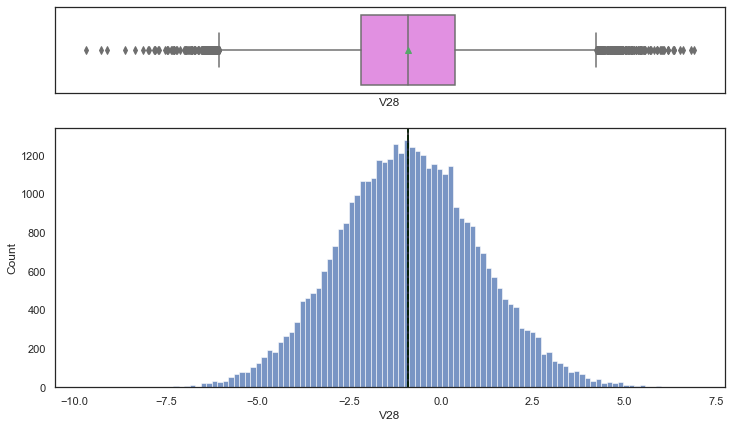

In [47]:
# Observations on V28
histogram_boxplot(ReneWind, "V28")

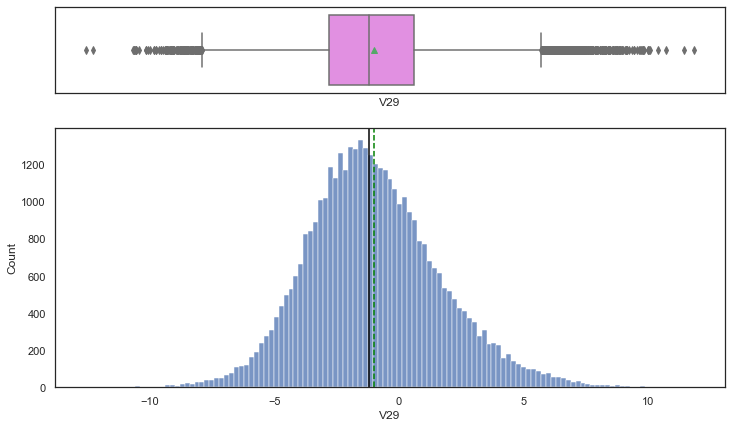

In [48]:
# Observations on V29
histogram_boxplot(ReneWind, "V29")

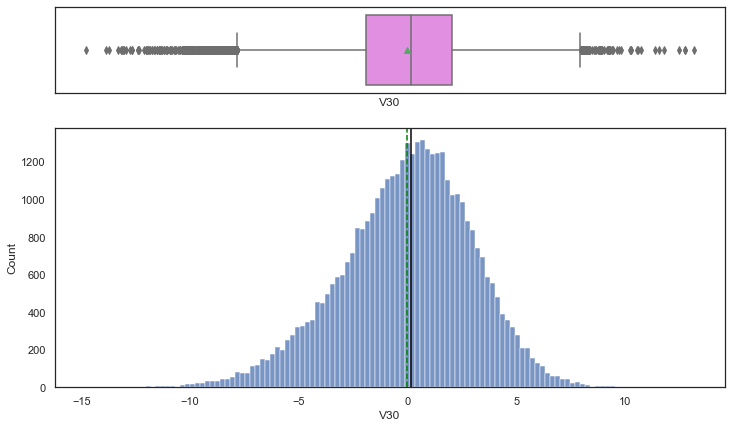

In [49]:
# Observations on V30

histogram_boxplot(ReneWind, "V30")

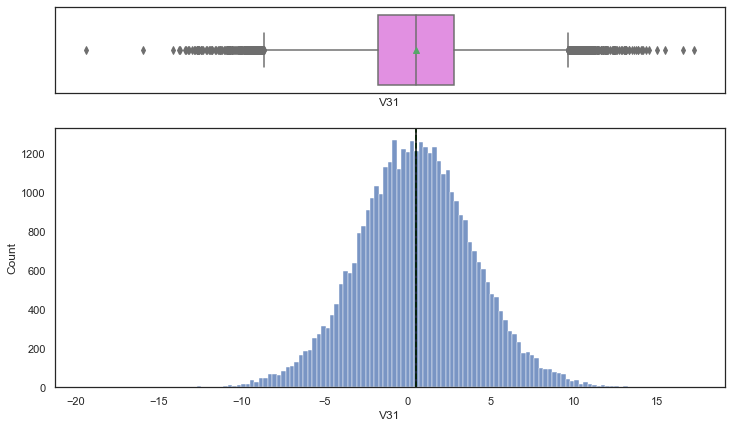

In [50]:
# Observations on V31
histogram_boxplot(ReneWind, "V31")

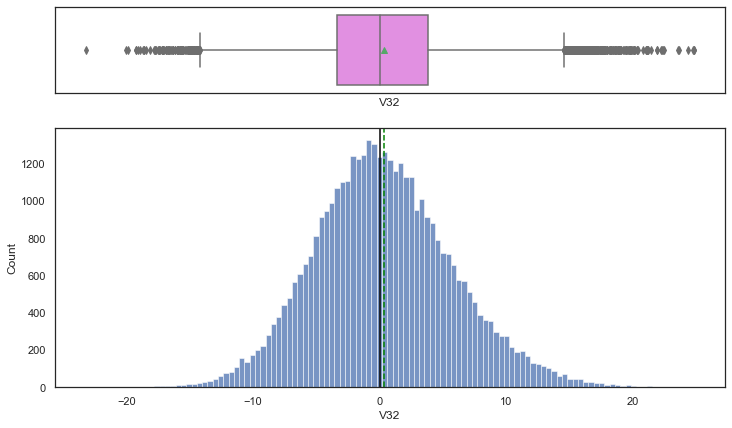

In [51]:
# Observations on V32
histogram_boxplot(ReneWind, "V32")

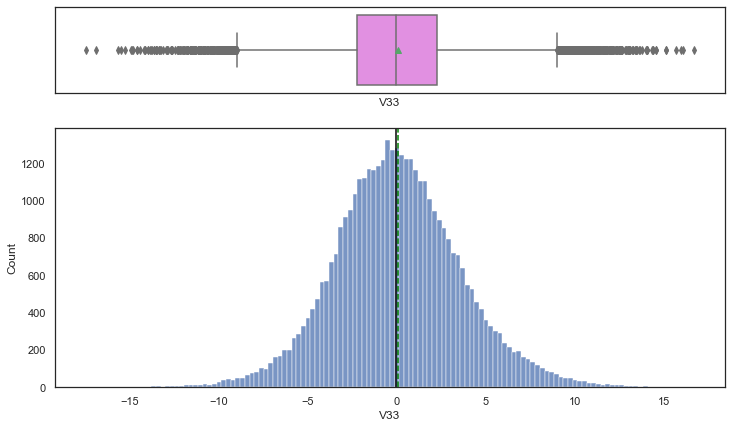

In [52]:
# Observations on V33
histogram_boxplot(ReneWind, "V33")

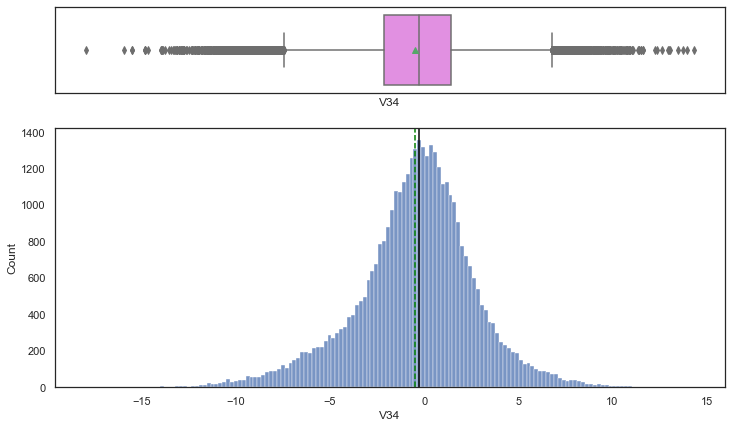

In [53]:
# Observations on V34
histogram_boxplot(ReneWind, "V34")

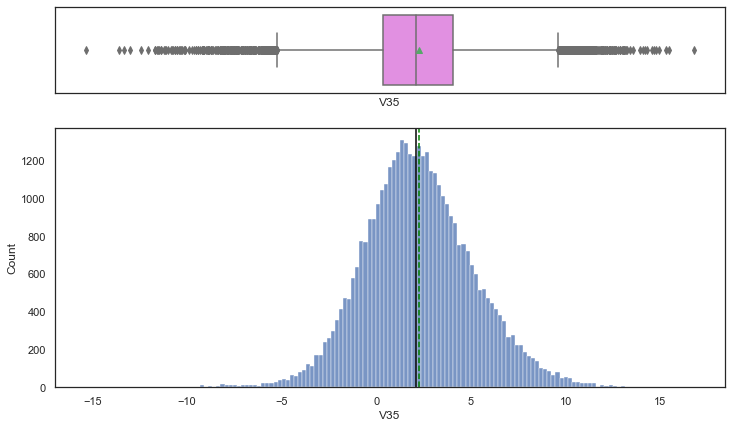

In [54]:
# Observations on V35
histogram_boxplot(ReneWind, "V35")

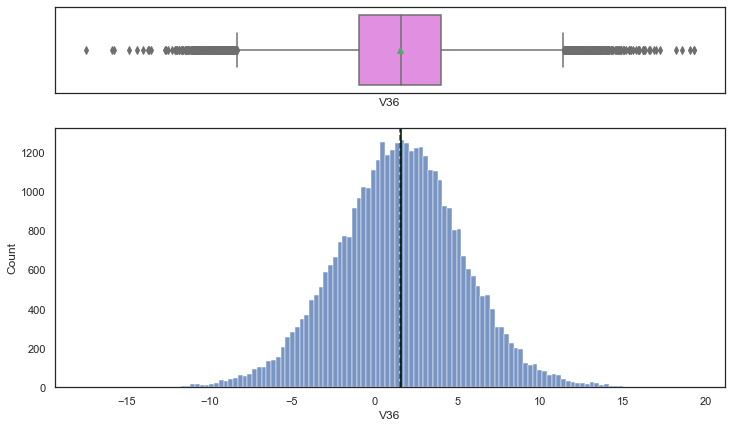

In [55]:
# Observations on V36
histogram_boxplot(ReneWind, "V36")

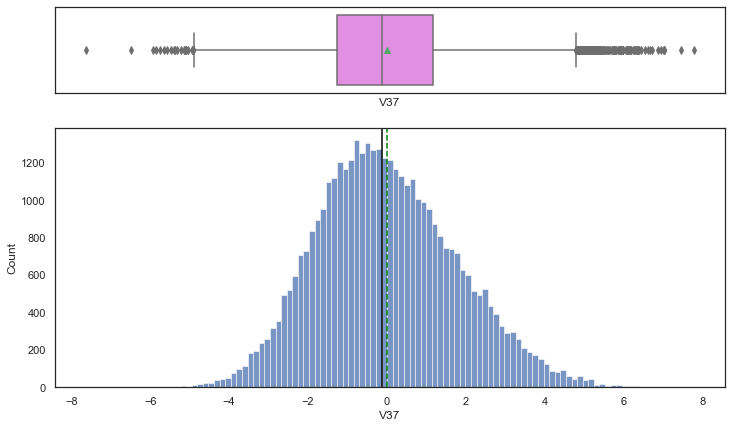

In [56]:
# Observations on V37
histogram_boxplot(ReneWind, "V37")

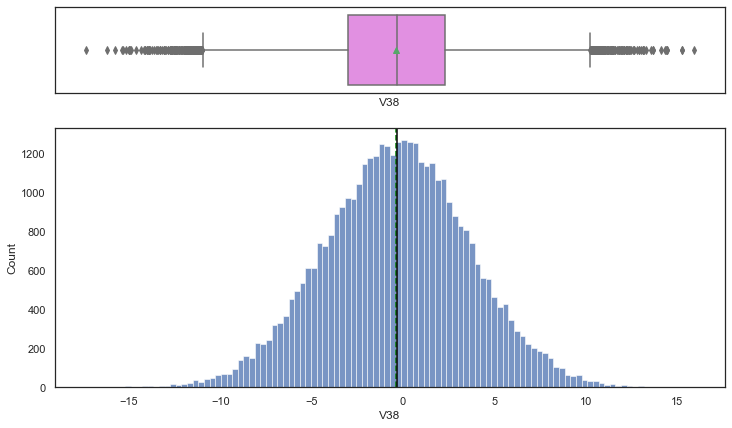

In [57]:
# Observations on V38
histogram_boxplot(ReneWind, "V38")

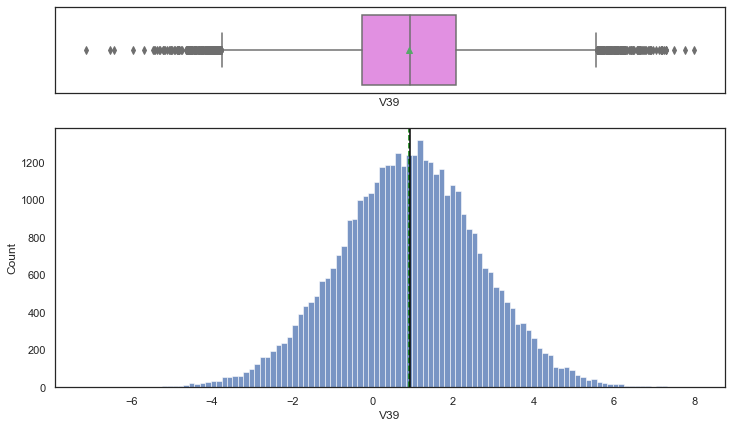

In [58]:
# Observations on V39
histogram_boxplot(ReneWind, "V39")

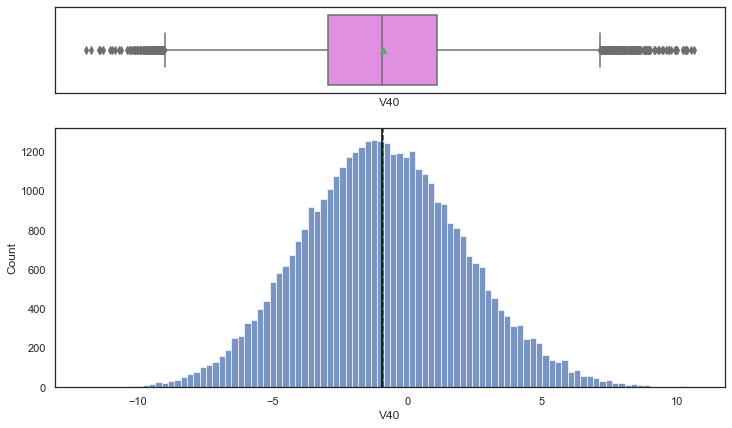

In [59]:
# Observations on V40
histogram_boxplot(ReneWind, "V40")

In [60]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

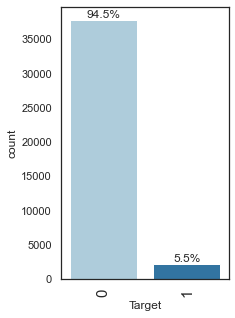

In [61]:
# observations on Marital_Status
labeled_barplot(ReneWind, "Target", perc=True)

* 94.5% are not failed(0) and 5.5% are failed(1) generator of wind turbines using sensors.

### Bivariate Analysis

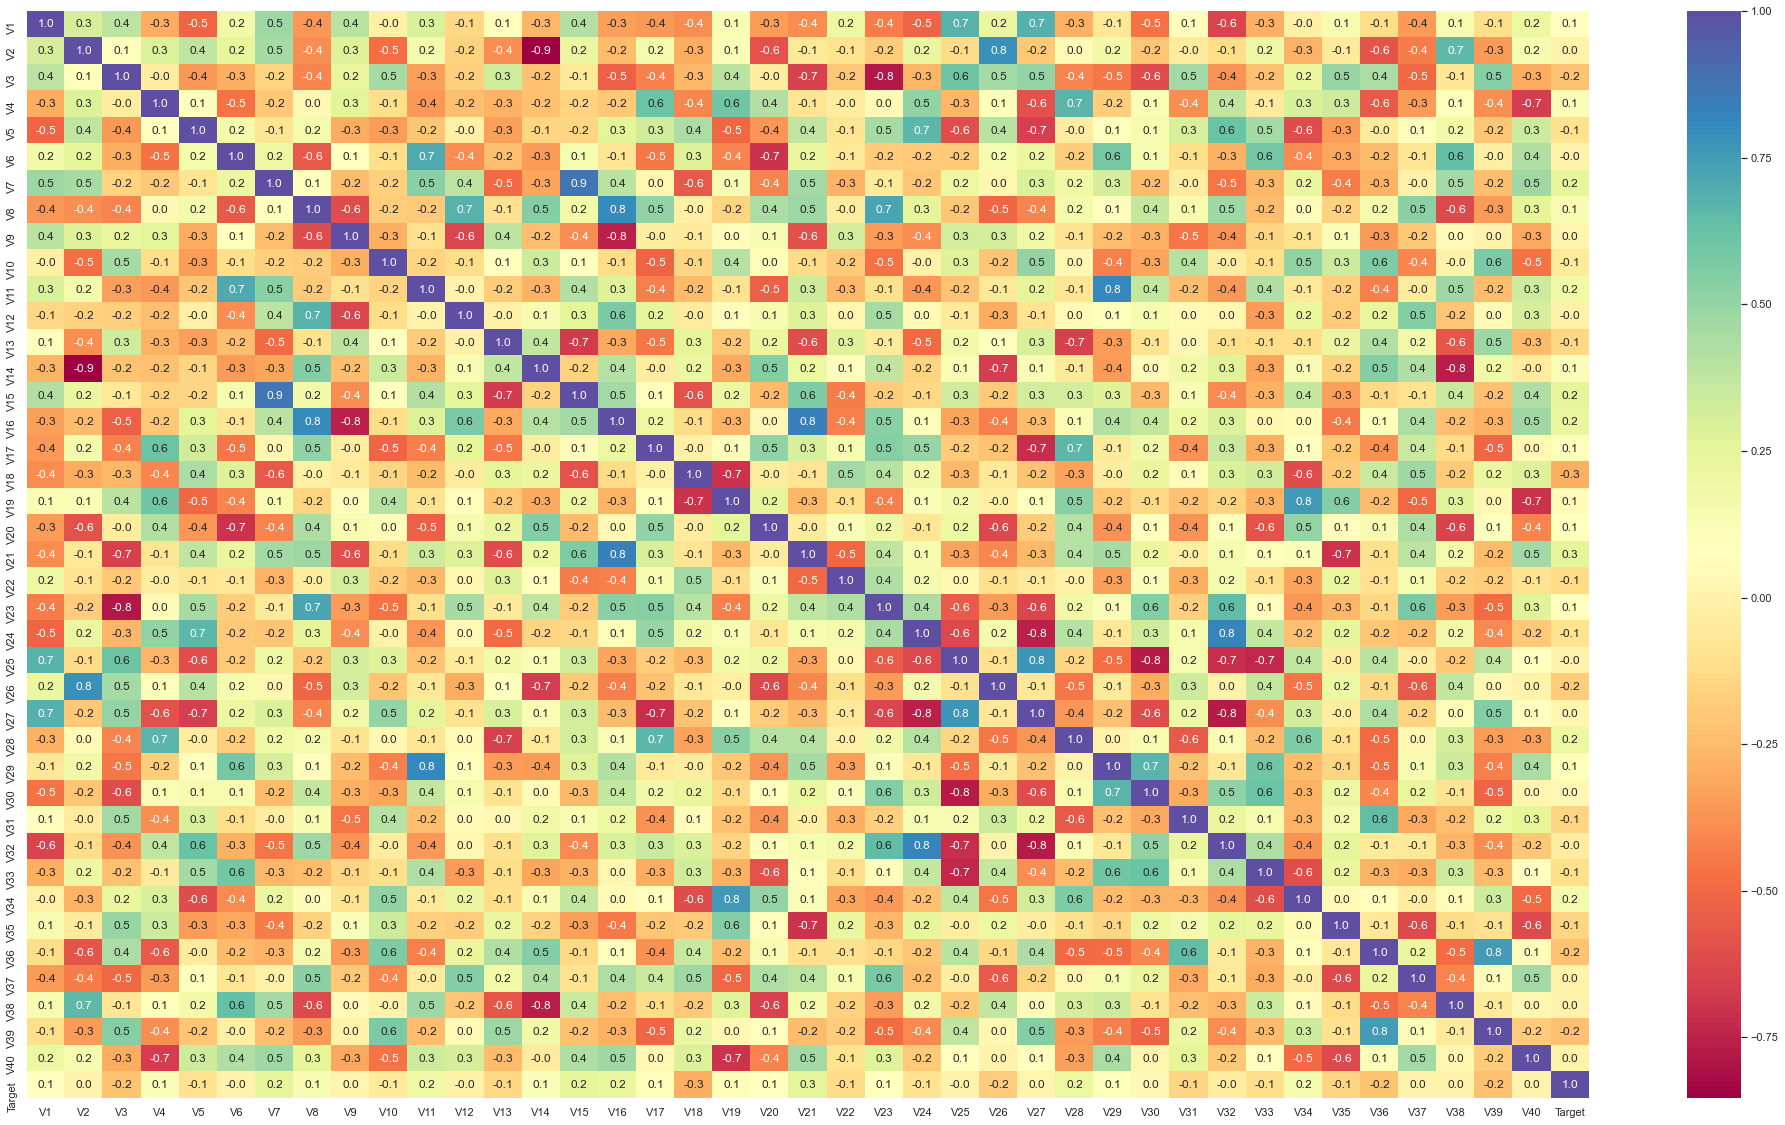

In [62]:
plt.figure(figsize=(35, 20))
sns.heatmap(ReneWind.corr(), annot=True, fmt=".1f", cmap="Spectral")
plt.show()

* There is a strong correlation between V7 and V15 with 0.9
* Strong correlation between V8 and V16, V16 and V21, V2 and V26, V11 and V29 with 0.8
* Slightly strong correlation between V8 and V23 , V5 and V24, V1 and V27, V4 and V28, V2 and V38 with 0.7
* However, there is only weak correlation between the Target columns and all other columns.

## Data Pre-processing

### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.


**The values obtained might not be integer always which is not be the best way to impute categorical values**
- To take care of that we will round off the obtained values to nearest integer value

**Missing Value Treatment for Train set**

In [63]:
ReneWind.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [64]:
imputer = KNNImputer(n_neighbors=5)

In [65]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "V1",
    "V2",
]

In [66]:
ReneWind[reqd_col_for_impute].head()# view the first five rows

,V1,V2
0,-4.465,-4.679
1,-2.910,-2.569
2,4.284,5.105
3,3.366,3.653
4,-3.832,-5.824


In [67]:
data1 = ReneWind.copy() # copying data to another variable to avoid any changes to original data

In [68]:
data1.head() # View first five rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,-2.910,-2.569,4.109,1.317,-1.621,-3.827,-1.617,0.669,0.387,0.854,-6.353,4.272,3.162,0.258,-3.547,-4.285,2.897,1.508,3.668,7.124,-4.096,1.015,-0.970,-0.968,2.064,-1.646,0.427,0.735,-4.470,-2.772,-2.505,-3.783,-6.823,4.909,0.482,5.338,2.381,-3.128,3.527,-3.020,0
2,4.284,5.105,6.092,2.640,-1.041,1.308,-1.876,-9.582,3.470,0.763,-2.573,-3.350,-0.595,-5.247,-4.310,-16.232,-1.000,2.318,5.942,-3.858,-11.599,4.021,-6.281,4.633,0.930,6.280,0.851,0.269,-2.206,-1.329,-2.399,-3.098,2.690,-1.643,7.566,-3.198,-3.496,8.105,0.562,-4.227,0
3,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
4,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0


**Missing Value Treatment for Test set**

In [69]:
ReneWind_Test.isnull().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [70]:
ReneWind_Test[reqd_col_for_impute].head() # view the first five rows

,V1,V2
0,-0.613,-3.820
1,-0.733,2.210
2,0.390,-0.512
3,3.412,1.153
4,-0.875,-0.641


In [71]:
ReneWind_Test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,-0.733,2.210,8.083,7.063,-1.510,-3.261,-3.334,-3.019,3.557,-1.511,-6.695,-1.937,0.141,-3.471,-4.233,-10.416,5.479,-0.023,6.036,6.603,-8.320,0.104,-6.879,1.457,2.110,3.381,-4.467,0.996,-1.409,-0.694,-2.577,-3.270,-1.806,1.798,5.895,-1.312,-0.765,-1.408,0.557,-4.049,0
2,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
3,3.412,1.153,2.114,-2.275,0.088,-0.010,0.514,-1.371,1.863,-0.031,-0.414,-1.567,3.184,0.864,-0.417,-0.996,-3.087,-0.648,-2.732,-2.056,-1.620,-0.091,-1.512,-3.892,1.646,3.147,4.442,-2.524,-2.434,-4.086,2.828,-2.497,-1.776,-1.712,-1.506,2.242,-0.658,-1.862,0.846,0.857,0
4,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0


### Data Preparation for Modeling

In [72]:
# Defing x and y variable for train set
x = data1.drop(["Target"], axis=1)
y = data1["Target"]

In [73]:
# Define X and Y variables in the test set
X_test= ReneWind_Test.drop(["Target"], axis=1)
Y_test = ReneWind_Test["Target"]

In [74]:
# Splitting data into training and validation set

X_train, X_val, y_train, y_val = train_test_split(
    x, y, test_size=0.25, random_state=1, stratify=y
)
print(X_train.shape, X_val.shape)

(30000, 40) (10000, 40)


In [75]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])

Number of rows in train data = 30000
Number of rows in validation data = 10000


### Missing-Value Treatment 

* We will use mode to impute missing values in V1 and V2 column.

In [77]:
# Let's impute the missing values
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
cols_to_impute = ["V1", "V2"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_median.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_median.transform(X_val[cols_to_impute])


In [78]:
# Checking that no column has missing values in train and validation sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------


* All missing values have been treated.

## Model evaluation criterion

### 3 types of cost are associated with the provided problem
1. Replacement cost - False Negatives - Predicting no failure, while there will be a failure
2. Inspection cost - False Positives - Predicting failure, while there is no failure 
3. Repair cost - True Positives - Predicting failure correctly

### How to reduce the overall cost?
* We need to create a customized metric, that can help to bring down the overall cost.
* The cost associated with any model = TP * 15000 + FP * 5000 + FN * 40000
* And the minimum possible cost will be when, the model will be able to identify all failures, in that case, the cost will be (TP + FN) * 15000
* So, we will try to maximize `Minimum cost/Cost associated with model`

**Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [79]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using model
    Min_Cost = (TP + FN) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = Min_Cost / Cost  # ratio of minimum possible maintenance cost and maintenance cost by model

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minimum_Vs_Model_cost": Percent,
        },
        index=[0],
    )

    return df_perf

In [80]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Defining scorer to be used for hyperparameter tuning**

- Every prediction of a classification model will be either a TP, FP, FN or TN.
- Till now at most of the places we wanted to reduce False negatives and hence we tried to maximize "Recall".
- To maximize Recall, we used Recall as a **scorer** in hyperparameter tuning.
- Here, we not only want to minimize false negatives but also false positives and we are also given the costs associated with each type of prediction.
- So, overall we want to reduce the maintenance cost which is: `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
- In simple language, we can say that we are assigning different weightage to the different types of predictions.
- Do we have any such metric which can help us minimize the maintenance cost? i.e., help us reduce FP and FN as per the weightage - We don't have any such inbuilt metric.
- In sklearn, we can define **custom scorers** also as per our need.
- For this classification problem, we need to reduce the maintenance cost, which can be reiterated as:
  - Minimize (maintenance cost)
  - Maximize (1/maintenance cost)
  - Maximize (minimum possible maintenance cost/maintenance cost)
- Eventually, all 3 metrics will do the same work in the backend and the only difference will be in the scale of the values of the metric.

- The metric provided in the next cell is to `maximize(minimum possible maintenance cost/maintenance cost)`
- You can modify the metric as per convenience and use it further to tune the models.

In [81]:
# defining metric to be used for optimization and with cross-validation
def Minimum_Vs_Model_cost(y_train, y_pred):
    """
    We want the model to optimize the maintenance cost and reduce it to the lowest possible value.
    The lowest possible maintenance cost will be achieved when each sample is predicted correctly.

    In such a scenario, the maintenance cost will be the total number of failures times the maintenance cost of replacing one generator,
    which is given by (TP + FN) * 40 (i.e., the actual positives*40).
    For any other scenario,
    the maintenance cost associated with the model will be given by (TP * 15 + FP * 5 + FN * 40).

    We will use the ratio of these two maintenance costs as the cost function for our model.
    The greater the ratio, the lower the associated maintenance cost and the better the model.
    """
    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)


# A value of .80 here, will represent that the minimum maintenance cost is 80% of the maintenance cost associated with the model.
# Since minimum maintenance cost is constant for any data, when minimum cost will become 100% of maintenance cost associated with the model
# Model will have give the least possible maintenance cost.


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Higher the values, the lower the maintenance cost

## Model Building with Original data

### Logistic Regression 

In [82]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

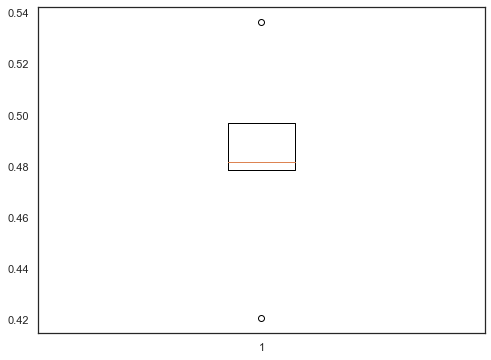

In [83]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.48 to 0.50 recall.
* Let's check the performance on validation data.

In [84]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.967,0.485,0.853,0.619,0.530


In [85]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.966,0.463,0.849,0.599,0.520


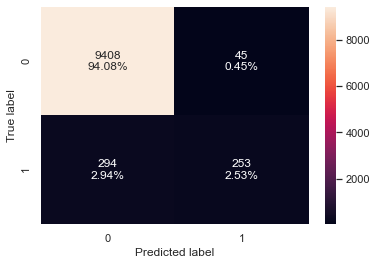

In [86]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Logistic Regression has given a generalized performance on training and validation set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [87]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



### Logistic Regression on oversampled data

In [88]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

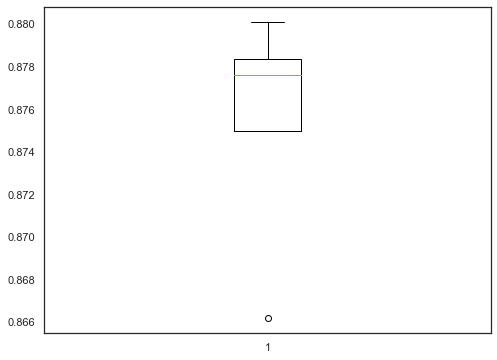

In [89]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.874 to 0.880, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [90]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.874,0.876,0.874,0.875,0.800


In [91]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.873,0.839,0.279,0.419,0.503


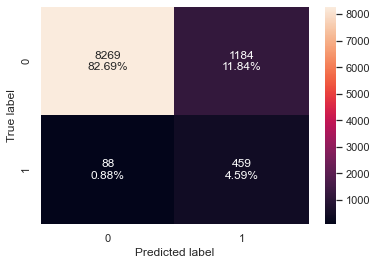

In [92]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

* Performance on the training set improved but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Lets try Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [93]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [94]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1640
Before Under Sampling, counts of label 'No': 28360 

After Under Sampling, counts of label 'Yes': 1640
After Under Sampling, counts of label 'No': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



### Logistic Regression on undersampled data

In [95]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

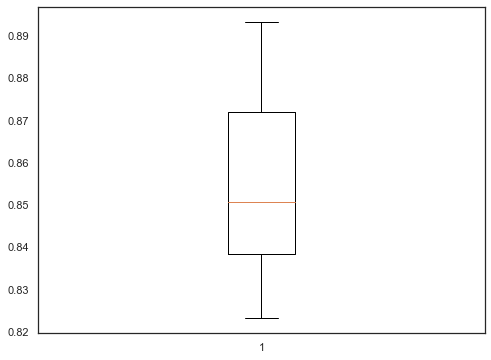

In [96]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.82 to 0.89, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the validation set.

In [97]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.859,0.855,0.862,0.859,0.777


In [98]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.864,0.846,0.266,0.405,0.492


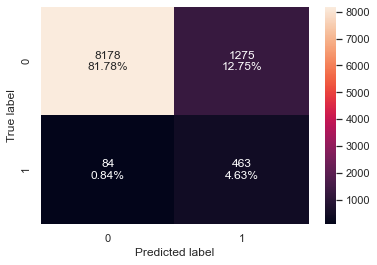

In [99]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

*

## Decision Tree

### Summary of Recall performance on Models

In [100]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 73.47560975609755
Random forest: 76.21951219512195
GBM: 71.70731707317073
Adaboost: 61.646341463414636
Xgboost: 81.58536585365853
dtree: 73.35365853658537

Validation Performance:

Bagging: 0.7349177330895795
Random forest: 0.7659963436928702
GBM: 0.7148080438756855
Adaboost: 0.6142595978062158
Xgboost: 0.8263254113345521
dtree: 0.7477148080438757


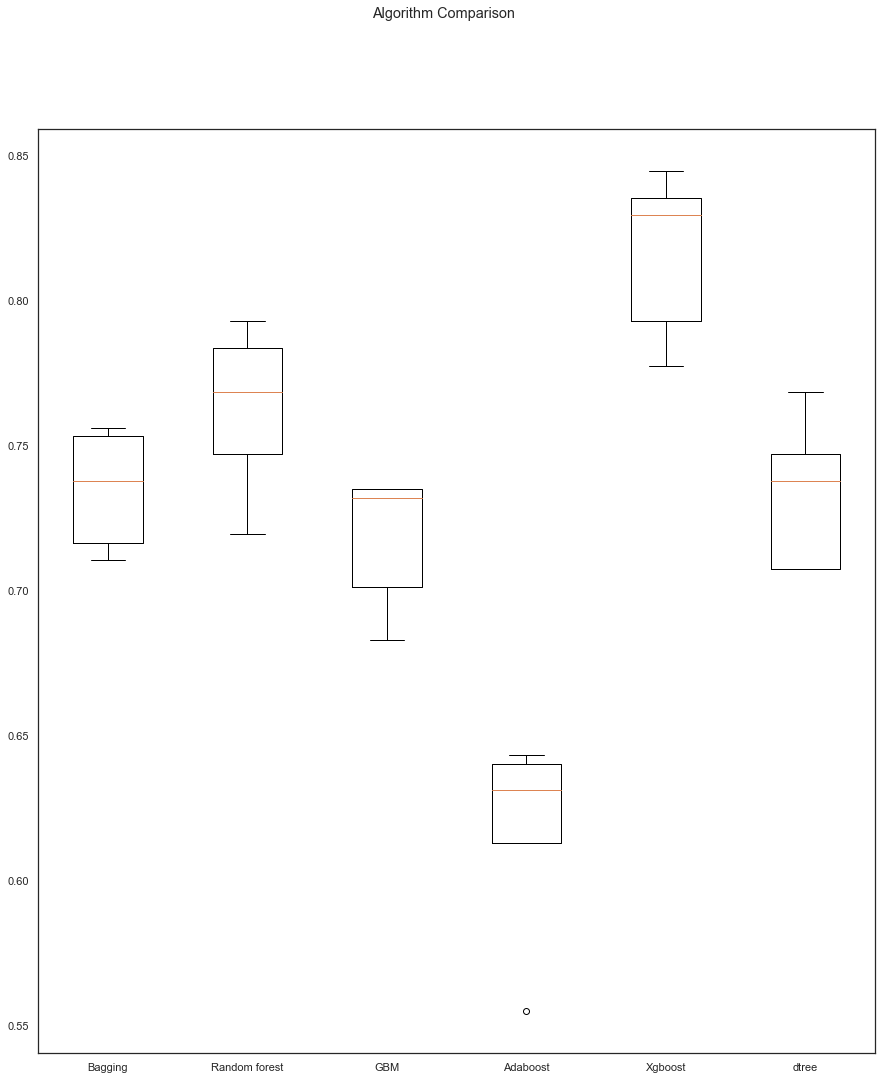

In [101]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that the xgboost is giving the highest cross-validated recall followed by Random Forest.
- Although the boxplot shows that the performance of Bagging, Random forest and decision tree are consistent and their performance on the validation set is good.
- Adaboost had the least performance on the validation set.
- We will tune the best models and see if the performance improves.

In [102]:
# Fitting the model
dtree = DecisionTreeClassifier(random_state=1, criterion="gini", max_depth=None, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

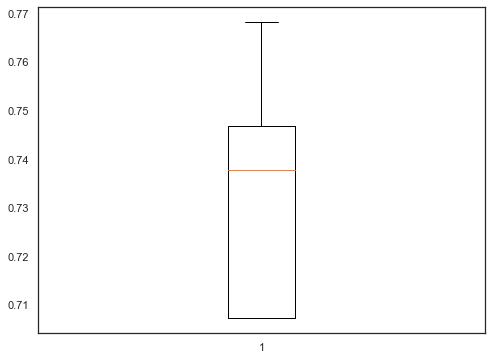

In [103]:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_bfr = cross_val_score(
        estimator=dtree, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    # Plotting boxplots for CV scores of model defined above
    plt.figure(figsize=(8,6))
    plt.boxplot(cv_result_bfr)
    plt.show()

* Performance on training set varies between 0.71 to 0.77 recall.
* Let's check the performance on validation data.

In [104]:
# Calculating different metrics on train set
dtree_classifier_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
print("Training performance:")
dtree_classifier_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


In [105]:
# Calculating different metrics on validation set
dtree_classifier_val_perf = model_performance_classification_sklearn(dtree, X_val, y_val)
print("Validation performance:")
dtree_classifier_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.971,0.748,0.728,0.738,0.661


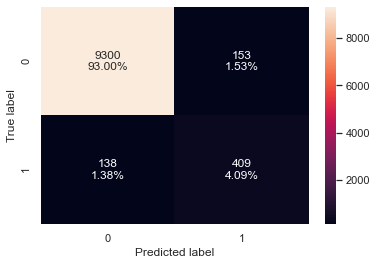

In [106]:
# creating confusion matrix
confusion_matrix_sklearn(dtree, X_val, y_val)

- The validation recall has same performance to the validation recall on model with default parameters
- The validation recall is just 74% i.e. the model is good at identifying defaulters. We can try oversampling (increase training data) to see if the model performance will decrease or improved

### Oversampling train data using SMOTE

In [107]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



### Decision Tree on oversampled data

In [108]:
dtree_over = DecisionTreeClassifier(random_state=1, criterion="gini", max_depth=None, min_samples_split=2)

# Training the basic logistic regression model with training set
dtree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

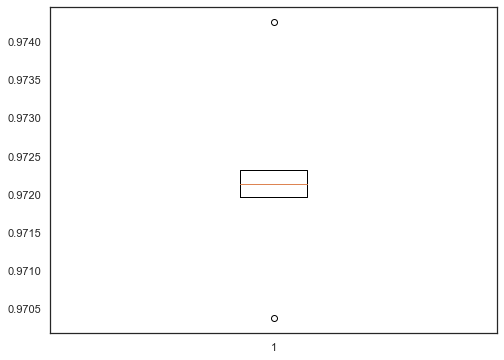

In [109]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=dtree_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.970 to 0.974, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [110]:
# Calculating different metrics on train set
dtree_over_train_perf = model_performance_classification_sklearn(
    dtree_over, X_train_over, y_train_over
)
print("Training performance:")
dtree_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


In [111]:
# Calculating different metrics on validation set
dtree_over_train_perf = model_performance_classification_sklearn(
    dtree_over, X_val, y_val
)
print("validation performance:")
dtree_over_train_perf

validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.951,0.814,0.535,0.645,0.647


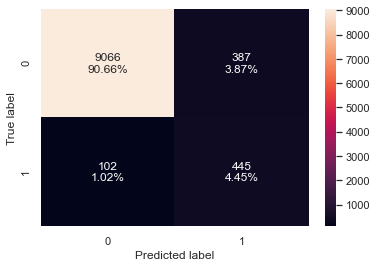

In [112]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_over, X_val, y_val)

* Performance on the training set improved but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Let's try undersampling.

### Undersampling train data using Random Under Sampler

In [113]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [114]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1640
Before Under Sampling, counts of label 'No': 28360 

After Under Sampling, counts of label 'Yes': 1640
After Under Sampling, counts of label 'No': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



### Decision Tree on undersampled data

In [115]:
dtree_under = DecisionTreeClassifier(random_state=1, criterion="gini", max_depth=None, min_samples_split=2)
dtree_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

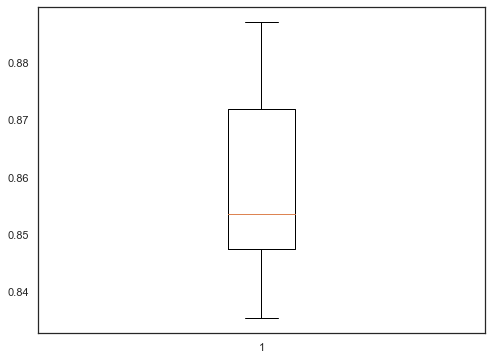

In [116]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=dtree_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.84 to 0.88, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the validation set.

In [117]:
# Calculating different metrics on train set
dtree_under_train_perf = model_performance_classification_sklearn(
    dtree_under, X_train_un, y_train_un
)
print("Training performance:")
dtree_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


In [118]:
# Calculating different metrics on validation set
dtree_under_val_perf = model_performance_classification_sklearn(
    dtree_under, X_val, y_val
)
print("Validation performance:")
dtree_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.866,0.854,0.271,0.411,0.498


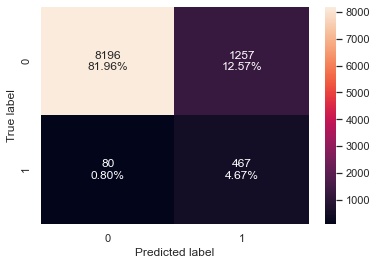

In [119]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_under, X_val, y_val)

*

## Bagging Classifier

In [120]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

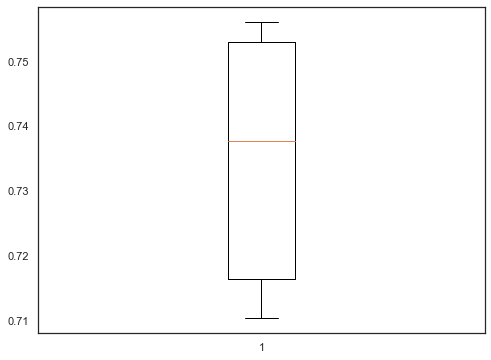

In [121]:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_bfr = cross_val_score(
        estimator=bagging, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    # Plotting boxplots for CV scores of model defined above
    plt.figure(figsize=(8,6))
    plt.boxplot(cv_result_bfr)
    plt.show()

* Performance on training set varies between 0.71 to 0.75 recall.
* Let's check the performance on validation data.

In [122]:
# Calculating different metrics on train set
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
print("Training performance:")
bagging_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.997,0.944,0.999,0.971,0.914


In [123]:
# Calculating different metrics on validation set
bagging_model_val_perf = model_performance_classification_sklearn(bagging, X_val, y_val)
print("Validation performance:")
bagging_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.984,0.735,0.962,0.833,0.689


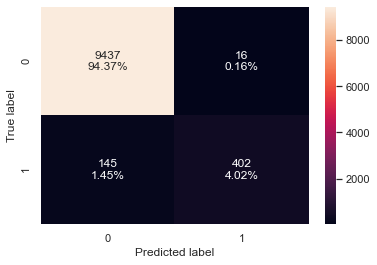

In [124]:
# creating confusion matrix
confusion_matrix_sklearn(bagging, X_val, y_val)

* Recall is quite low compared to recall on Decision Tree. We can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [125]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



### Bagging on on oversampled data

In [126]:
bagging_over = BaggingClassifier(random_state=1)

# Training the basic Bagging classifier model with training set
bagging_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by 

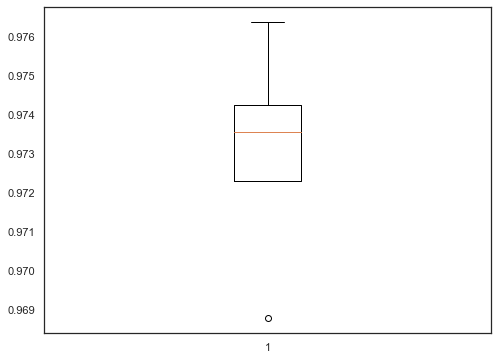

In [127]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=bagging_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.972 to 0.976, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [128]:
# Calculating different metrics on train set
bagging_over_train_perf = model_performance_classification_sklearn(
    bagging_over, X_train_over, y_train_over
)
print("Training performance:")
bagging_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.999,0.998,1.000,0.999,0.997


In [129]:
# Calculating different metrics on validation set
bagging_over_val_perf = model_performance_classification_sklearn(
    bagging_over, X_val, y_val
)
print("validation performance:")
bagging_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.984,0.835,0.866,0.850,0.759


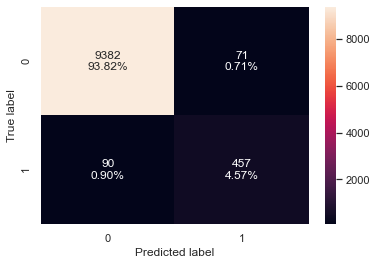

In [130]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_over, X_val, y_val)

* Performance on the training set improved but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Lets try Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [131]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [132]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1640
Before Under Sampling, counts of label 'No': 28360 

After Under Sampling, counts of label 'Yes': 1640
After Under Sampling, counts of label 'No': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



### Bagging Classifier on undersampled data

In [133]:
bagging_under = BaggingClassifier(random_state=1)
bagging_under.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

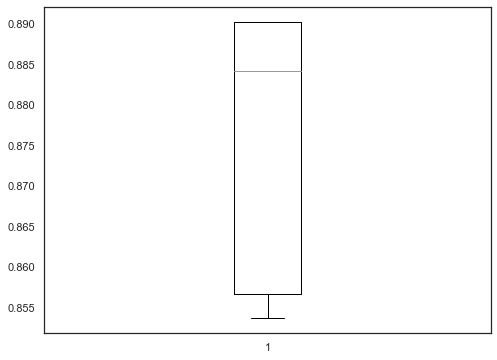

In [134]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=bagging_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.85 to 0.89, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the validation set.

In [135]:
# Calculating different metrics on train set
bagging_under_train_perf = model_performance_classification_sklearn(
    bagging_under, X_train_un, y_train_un
)
print("Training performance:")
bagging_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.989,0.980,0.998,0.989,0.967


In [136]:
# Calculating different metrics on validation set
bagging_under_val_perf = model_performance_classification_sklearn(
    bagging_under, X_val, y_val
)
print("Validation performance:")
bagging_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.951,0.863,0.529,0.656,0.674


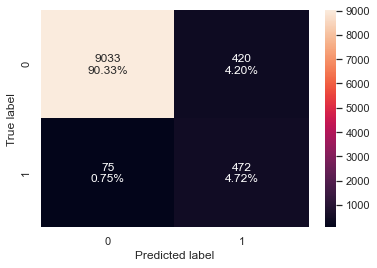

In [137]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_under, X_val, y_val)

* Model has given a generalized performance on training and validation set.
* Model performance has improved using downsampling - Bagging Classifier is now able to differentiate well between positive and negative classes.

## Random Forest

In [138]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

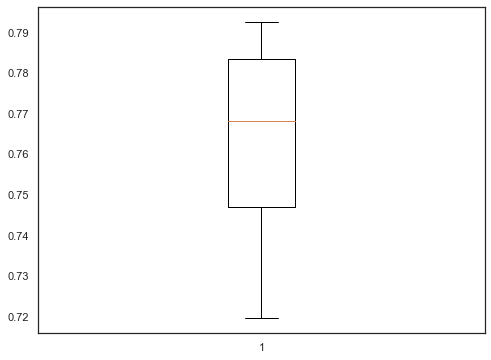

In [139]:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_bfr = cross_val_score(
        estimator=rf, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    # Plotting boxplots for CV scores of model defined above
    plt.figure(figsize=(8,6))
    plt.boxplot(cv_result_bfr)
    plt.show()

* Performance on training set varies between 0.72 to 0.79 recall.
* Let's check the performance on validation data.

In [140]:
# Calculating different metrics on train set
rf_model_train_perf = model_performance_classification_sklearn(
    rf, X_train, y_train
)
print("Training performance:")
rf_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


In [141]:
# Calculating different metrics on validation set
rf_model_val_perf = model_performance_classification_sklearn(rf, X_val, y_val)
print("Validation performance:")
rf_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.987,0.766,0.991,0.864,0.718


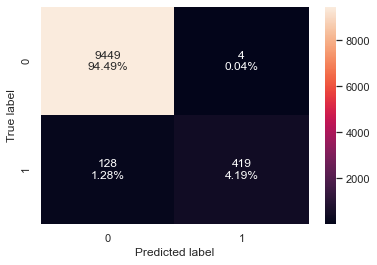

In [142]:
# creating confusion matrix
confusion_matrix_sklearn(rf, X_val, y_val)

* Logistic Regression has given a generalized performance on training and validation set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [143]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



### Random Forest on oversampled data

In [144]:
rf_over = RandomForestClassifier(random_state=1)

# Training the basic Random Forest model with training set
rf_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

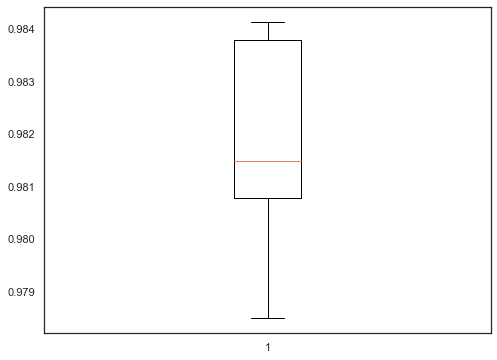

In [145]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=rf_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.97 to 0.98, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [146]:
# Calculating different metrics on train set
rf_over_train_perf = model_performance_classification_sklearn(
    rf_over, X_train_over, y_train_over
)
print("Training performance:")
rf_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


In [147]:
# Calculating different metrics on validation set
rf_over_val_perf = model_performance_classification_sklearn(
    rf_over, X_val, y_val
)
print("validation performance:")
rf_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.991,0.868,0.962,0.913,0.812


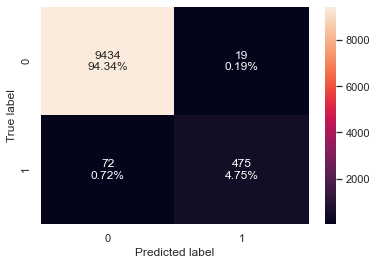

In [148]:
# creating confusion matrix
confusion_matrix_sklearn(rf_over, X_val, y_val)

* Performance on the training set improved but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Lets try Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [149]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [150]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1640
Before Under Sampling, counts of label 'No': 28360 

After Under Sampling, counts of label 'Yes': 1640
After Under Sampling, counts of label 'No': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



### Random Forest on undersampled data

In [151]:
rf_under = RandomForestClassifier(random_state=1)
rf_under.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

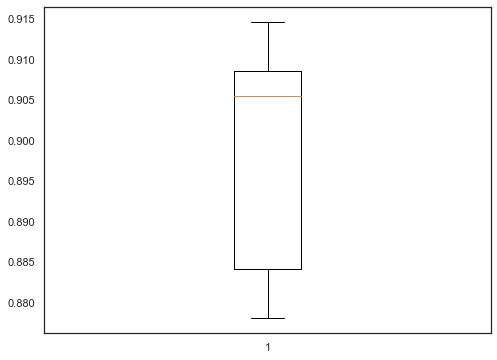

In [152]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=rf_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.88 to 0.91, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the validation set.

In [153]:
# Calculating different metrics on train set
rf_under_train_perf = model_performance_classification_sklearn(
    rf_under, X_train_un, y_train_un
)
print("Training performance:")
rf_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


In [154]:
# Calculating different metrics on validation set
rf_under_val_perf = model_performance_classification_sklearn(
    rf_under, X_val, y_val
)
print("Validation performance:")
rf_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.966,0.885,0.639,0.742,0.736


* Model has given a generalized performance on training and validation set.
* Model performance has improved using downsampling - Random Forest is now able to differentiate well between positive and negative classes.

## Gradient Boosting Classifer

In [155]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

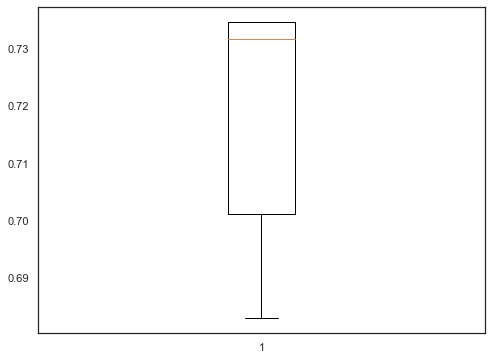

In [156]:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_bfr = cross_val_score(
        estimator=gb_classifier, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    # Plotting boxplots for CV scores of model defined above
    plt.figure(figsize=(8,6))
    plt.boxplot(cv_result_bfr)
    plt.show()

* Performance on training set varies between 0.69 to 0.73 recall.
* Let's check the performance on validation data.

In [157]:
# Calculating different metrics on train set
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:")
gb_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.987,0.780,0.981,0.869,0.729


In [158]:
# Calculating different metrics on validation set
gb_classifier_model_val_perf = model_performance_classification_sklearn(gb_classifier, X_val, y_val)
print("Validation performance:")
gb_classifier_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.983,0.715,0.954,0.817,0.673


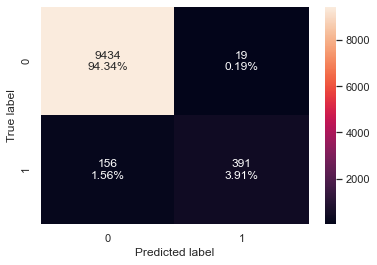

In [159]:
# creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_val, y_val)

* Gradient Boosting Classifier has given a generalized performance on training and validation set.
* Recall is quite low compared to Decision Tree and Bagging, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [160]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



### Gradient Boosting Classifier on oversampled data

In [161]:
gb_classifier_over = GradientBoostingClassifier(random_state=1)

# Training the basic Gradient Boost model with training set
gb_classifier_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

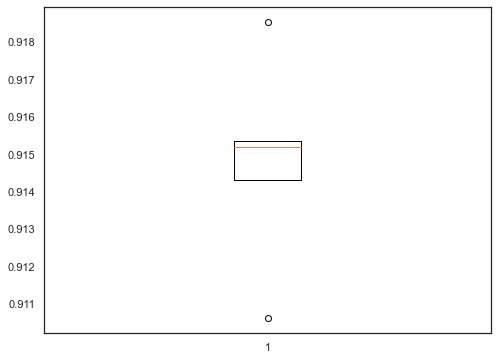

In [162]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=gb_classifier_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.874 to 0.88, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [163]:
# Calculating different metrics on train set
gb_classifier_over_train_perf = model_performance_classification_sklearn(
    gb_classifier_over, X_train_over, y_train_over
)
print("Training performance:")
gb_classifier_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.944,0.914,0.971,0.942,0.868


In [164]:
# Calculating different metrics on validation set
gb_classifier_over_val_perf = model_performance_classification_sklearn(
    gb_classifier_over, X_val, y_val
)
print("validation performance:")
gb_classifier_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.966,0.881,0.636,0.739,0.732


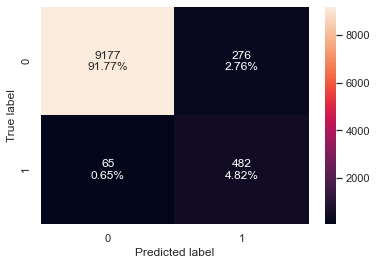

In [165]:
# creating confusion matrix
confusion_matrix_sklearn(gb_classifier_over, X_val, y_val)

* Performance on the training set improved but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Lets try undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [166]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [167]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1640
Before Under Sampling, counts of label 'No': 28360 

After Under Sampling, counts of label 'Yes': 1640
After Under Sampling, counts of label 'No': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



### Gradient Boosting Classifier on undersampled data

In [168]:
#Fitting the model
gb_classifier_under = GradientBoostingClassifier(random_state=1)
gb_classifier_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

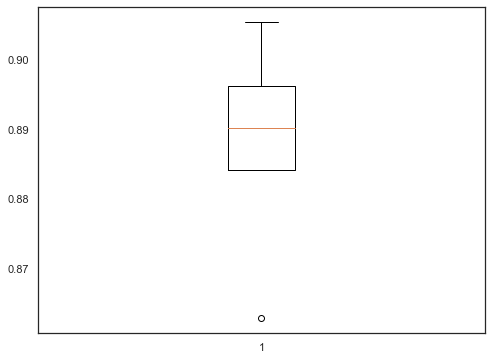

In [169]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=gb_classifier_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.88 to 0.90, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the validation set.

In [170]:
# Calculating different metrics on train set
gb_classifier_under_train_perf = model_performance_classification_sklearn(
    gb_classifier_under, X_train_un, y_train_un
)
print("Training performance:")
gb_classifier_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.952,0.918,0.985,0.950,0.877


In [171]:
# Calculating different metrics on validation set
gb_classifier_under_val_perf = model_performance_classification_sklearn(
    gb_classifier_under, X_val, y_val
)
print("Validation performance:")
gb_classifier_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.951,0.888,0.533,0.666,0.692


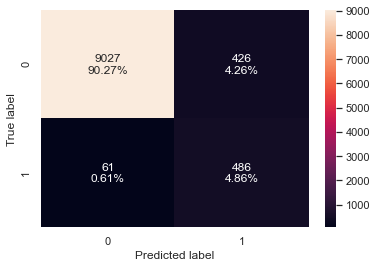

In [172]:
# creating confusion matrix
confusion_matrix_sklearn(gb_classifier_under, X_val, y_val)

* Model has given a generalized performance on training and validation set.
* Model performance has improved using downsampling - Gradient Boost Classifier is now able to differentiate well between positive and negative classes.

## AdaBoost Classifier

In [173]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that

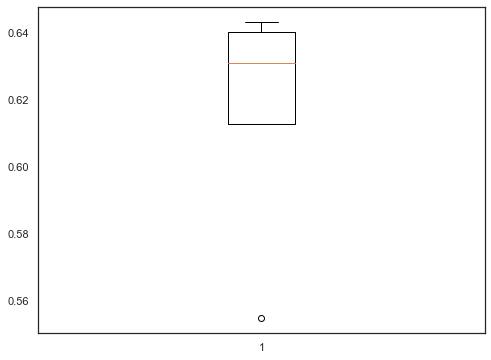

In [174]:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_bfr = cross_val_score(
        estimator=ab_classifier, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    # Plotting boxplots for CV scores of model defined above
    plt.figure(figsize=(8,6))
    plt.boxplot(cv_result_bfr)
    plt.show()

* Performance on training set varies between 0.60 to 0.64 recall.
* Let's check the performance on validation data.

In [175]:
# Calculating different metrics on train set
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance:")
ab_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.976,0.637,0.890,0.743,0.613


In [176]:
# Calculating different metrics on validation set
ab_classifier_model_val_perf = model_performance_classification_sklearn(ab_classifier, X_val, y_val)
print("Validation performance:")
ab_classifier_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.973,0.614,0.848,0.713,0.595


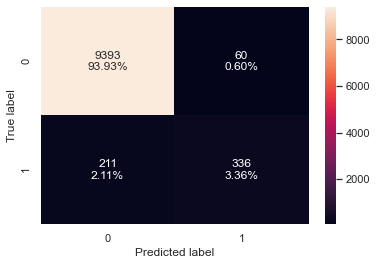

In [177]:
# creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_val, y_val)

* Adaboost Classifier has given a generalized performance on training and validation set.
* Recall is quite low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [178]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



### Adaboost Classifier on oversampled data

In [179]:
ab_classifier_over = AdaBoostClassifier(random_state=1)

# Training the basic AdaBoost Classifier model with training set
ab_classifier_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

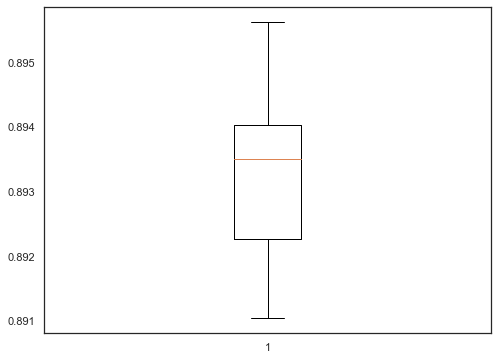

In [180]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=ab_classifier_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.891 to 0.895, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [181]:
# Calculating different metrics on train set
ab_classifier_over_train_perf = model_performance_classification_sklearn(
    ab_classifier_over, X_train_over, y_train_over
)
print("Training performance:")
ab_classifier_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.905,0.894,0.914,0.904,0.830


In [182]:
# Calculating different metrics on validation set
ab_classifier_over_val_perf = model_performance_classification_sklearn(
    ab_classifier_over, X_val, y_val
)
print("validation performance:")
ab_classifier_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.905,0.850,0.350,0.496,0.563


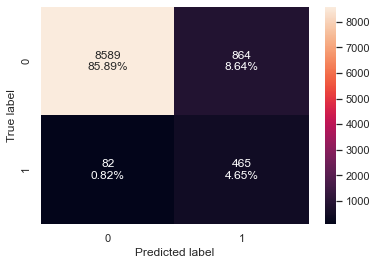

In [183]:
# creating confusion matrix
confusion_matrix_sklearn(ab_classifier_over, X_val, y_val)

* Performance on the training set improved but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Lets try Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [184]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [185]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1640
Before Under Sampling, counts of label 'No': 28360 

After Under Sampling, counts of label 'Yes': 1640
After Under Sampling, counts of label 'No': 1640 

After Under Sampling, the shape of train_X: (3280, 40)
After Under Sampling, the shape of train_y: (3280,) 



### Adaboost Classifier on undersampled data

In [186]:
#Fitting the model
ab_classifier_under = AdaBoostClassifier(random_state=1)
ab_classifier_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

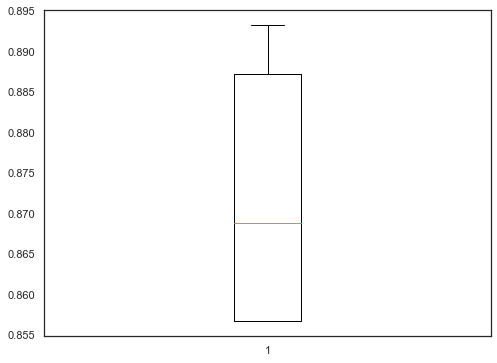

In [187]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=ab_classifier_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.85 to 0.89, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the validation set.

In [188]:
# Calculating different metrics on train set
ab_classifier_under_train_perf = model_performance_classification_sklearn(
    ab_classifier_under, X_train_un, y_train_un
)
print("Training performance:")
ab_classifier_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.906,0.894,0.916,0.905,0.831


In [189]:
# Calculating different metrics on validation set
ab_classifier_under_val_perf = model_performance_classification_sklearn(
    ab_classifier_under, X_val, y_val
)
print("Validation performance:")
ab_classifier_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.880,0.865,0.295,0.440,0.523


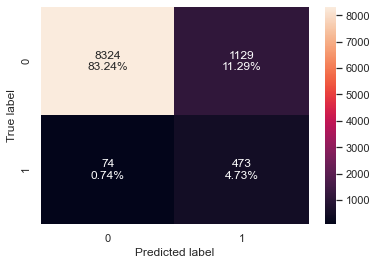

In [190]:
# creating confusion matrix
confusion_matrix_sklearn(ab_classifier_under, X_val, y_val)

* Model has given a generalized performance on training and validation set.
* Model performance has improved using downsampling - AdaBoost Classifier is now able to differentiate well between positive and negative classes.

## XGBoost Classifier

In [191]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

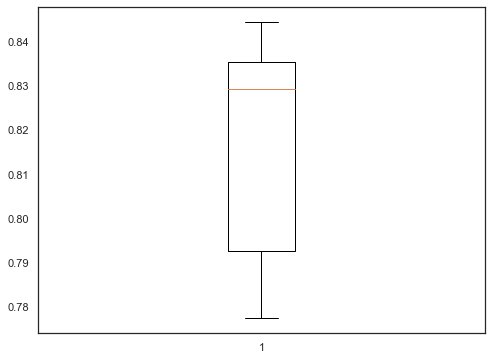

In [192]:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_bfr = cross_val_score(
        estimator=xgb_classifier, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    # Plotting boxplots for CV scores of model defined above
    plt.figure(figsize=(8,6))
    plt.boxplot(cv_result_bfr)
    plt.show()

* Performance on training set varies between 0.79 to 0.84 recall.
* Let's check the performance on validation data.

In [193]:
# Calculating different metrics on train set
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:")
xgb_classifier_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


In [194]:
# Calculating different metrics on validation set
xgb_classifier_model_val_perf = model_performance_classification_sklearn(xgb_classifier, X_val, y_val)
print("Validation performance:")
xgb_classifier_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.990,0.826,0.987,0.900,0.773


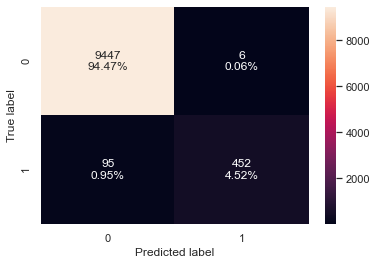

In [195]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_val, y_val)

* XGBoost Classifier has given a generalized performance on training and validation set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [196]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



### XGBoost Claassifier on oversampled data

In [197]:
xgb_classifier_over =  XGBClassifier(random_state=1, eval_metric='logloss')

# Training the basic XGBoost Classifier model with training set
xgb_classifier_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

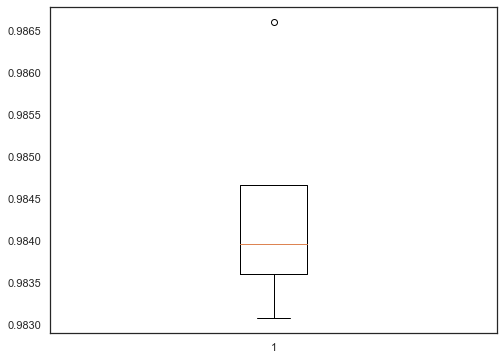

In [198]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=xgb_classifier_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.983 to 0.984, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [199]:
# Calculating different metrics on train set
xgb_classifier_over_train_perf = model_performance_classification_sklearn(
    xgb_classifier_over, X_train_over, y_train_over
)
print("Training performance:")
xgb_classifier_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.999,0.999,0.999,0.999,0.998


In [200]:
# Calculating different metrics on validation set
xgb_classifier_over_val_perf = model_performance_classification_sklearn(
    xgb_classifier_over, X_val, y_val
)
print("validation performance:")
xgb_classifier_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.989,0.879,0.911,0.895,0.813


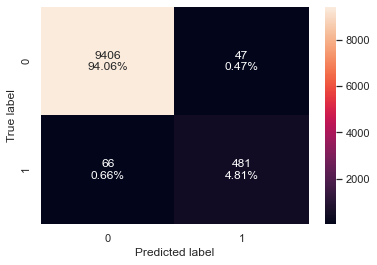

In [201]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_over, X_val, y_val)

* Performance on the training set improved but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Lets try Undersampling the train to handle the imbalance between classes and check the model performance.

### Undersampling train data using Random Under Sampler

In [202]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [203]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1640
Before Under Sampling, counts of label 'No': 28360 

After Under Sampling, counts of label 'Yes': 1640
After Under Sampling, counts of label 'No': 1640 

After Under Sampling, the shape of train_X: (3280, 40)


### XGBoost Classifier on undersampled data

In [204]:
#Fitting the model
xgb_classifier_under = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier_under.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

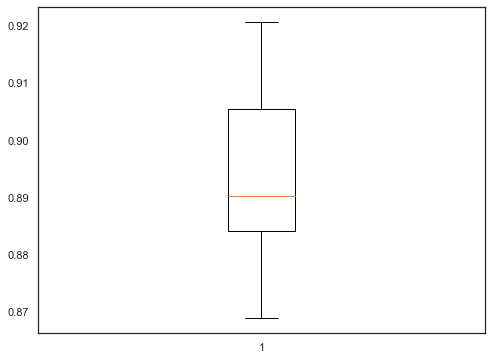

In [205]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=xgb_classifier_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(8,6))
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.88 to 0.92, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the validation set.

In [206]:
# Calculating different metrics on train set
xgb_classifier_under_train_perf = model_performance_classification_sklearn(
    xgb_classifier_under, X_train_un, y_train_un
)
print("Training performance:")
xgb_classifier_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.000,1.000,1.000,1.000,1.000


In [207]:
# Calculating different metrics on validation set
xgb_classifier_under_val_perf = model_performance_classification_sklearn(
    xgb_classifier_under, X_val, y_val
)
print("Validation performance:")
xgb_classifier_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.990,0.826,0.987,0.900,0.773


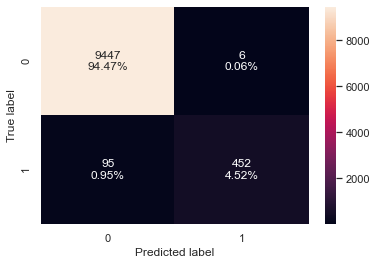

In [208]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_under, X_val, y_val)

* Model has given a generalized performance on training and validation set.
* Model performance has improved using downsampling - XGBoost Clasifier is now able to differentiate well between positive and negative classes.

## Model Selection

### Comparing all models

In [209]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_under_train_perf.T,
        dtree_classifier_train_perf.T,
        dtree_under_train_perf.T,
        dtree_over_train_perf.T,
        bagging_model_train_perf.T,
        bagging_under_train_perf.T,
        bagging_over_train_perf.T,
        rf_model_train_perf.T,
        rf_over_train_perf.T,
        rf_under_train_perf.T,
        gb_classifier_model_train_perf.T,
        gb_classifier_over_train_perf.T,
        gb_classifier_under_train_perf.T,
        ab_classifier_model_train_perf.T,
        ab_classifier_over_train_perf.T,
        ab_classifier_under_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_classifier_over_train_perf.T,
        xgb_classifier_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Logistic Regression with undersampled data",
    "Decision Tree",
    "Decision Tree with oversampled data",
    "Decision Tree with undersampled data",
    "Bagging Classifier",
    "Bagging Classifier with oversampled data",
    "Bagging Classifier with undersampled data",
    "Random Forest",
    "Random Forest with oversampled data",
    "Random Forest with undersampled data",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier with oversampled data",
    "Gradient Boost Classifier with undersampled data",
    "AdaBoost Classifier",
    "AdaBoost Boost Classifier with oversampled data",
    "AdaBoost Boost Classifier with undersampled data",
    "XGBoost Classifier",
    "XGBoost Classifier with oversampled data",
    "XGBoost Classifier with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Logistic Regression with undersampled data,Decision Tree,Decision Tree with oversampled data,Decision Tree with undersampled data,Bagging Classifier,Bagging Classifier with oversampled data,Bagging Classifier with undersampled data,Random Forest,Random Forest with oversampled data,Random Forest with undersampled data,Gradient Boost Classifier,Gradient Boost Classifier with oversampled data,Gradient Boost Classifier with undersampled data,AdaBoost Classifier,AdaBoost Boost Classifier with oversampled data,AdaBoost Boost Classifier with undersampled data,XGBoost Classifier,XGBoost Classifier with oversampled data,XGBoost Classifier with undersampled data
Accuracy,0.967,0.874,0.859,1.000,1.000,0.951,0.997,0.989,0.999,1.000,1.000,1.000,0.987,0.944,0.952,0.976,0.905,0.906,1.000,0.999,1.000
Recall,0.485,0.876,0.855,1.000,1.000,0.814,0.944,0.980,0.998,1.000,1.000,1.000,0.780,0.914,0.918,0.637,0.894,0.894,1.000,0.999,1.000
Precision,0.853,0.874,0.862,1.000,1.000,0.535,0.999,0.998,1.000,1.000,1.000,1.000,0.981,0.971,0.985,0.890,0.914,0.916,1.000,0.999,1.000
F1,0.619,0.875,0.859,1.000,1.000,0.645,0.971,0.989,0.999,1.000,1.000,1.000,0.869,0.942,0.950,0.743,0.904,0.905,1.000,0.999,1.000
Minimum_Vs_Model_cost,0.530,0.800,0.777,1.000,1.000,0.647,0.914,0.967,0.997,1.000,1.000,1.000,0.729,0.868,0.877,0.613,0.830,0.831,1.000,0.998,1.000


In [210]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_under_val_perf.T,
        dtree_classifier_val_perf.T,
        dtree_under_val_perf.T,
        dtree_over_train_perf.T,
        bagging_model_val_perf.T,
        bagging_under_val_perf.T,
        bagging_over_val_perf.T,
        rf_model_val_perf.T,
        rf_over_val_perf.T,
        rf_under_val_perf.T,
        gb_classifier_model_val_perf.T,
        gb_classifier_over_val_perf.T,
        gb_classifier_under_val_perf.T,
        ab_classifier_model_val_perf.T,
        ab_classifier_over_val_perf.T,
        ab_classifier_under_val_perf.T,
        xgb_classifier_model_val_perf.T,
        xgb_classifier_over_val_perf.T,
        xgb_classifier_under_val_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Logistic Regression with undersampled data",
    "Decision Tree",
    "Decision Tree with oversampled data",
    "Decision Tree with undersampled data",
    "Bagging Classifier",
    "Bagging Classifier with oversampled data",
    "Bagging Classifier with undersampled data",
    "Random Forest",
    "Random Forest with oversampled data",
    "Random Forest with undersampled data",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier with oversampled data",
    "Gradient Boost Classifier with undersampled data",
    "AdaBoost Classifier",
    "AdaBoost Boost Classifier with oversampled data",
    "AdaBoost Boost Classifier with undersampled data",
    "XGBoost Classifier",
    "XGBoost Classifier with oversampled data",
    "XGBoost Classifier with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Logistic Regression with undersampled data,Decision Tree,Decision Tree with oversampled data,Decision Tree with undersampled data,Bagging Classifier,Bagging Classifier with oversampled data,Bagging Classifier with undersampled data,Random Forest,Random Forest with oversampled data,Random Forest with undersampled data,Gradient Boost Classifier,Gradient Boost Classifier with oversampled data,Gradient Boost Classifier with undersampled data,AdaBoost Classifier,AdaBoost Boost Classifier with oversampled data,AdaBoost Boost Classifier with undersampled data,XGBoost Classifier,XGBoost Classifier with oversampled data,XGBoost Classifier with undersampled data
Accuracy,0.966,0.873,0.864,0.971,0.866,0.951,0.984,0.951,0.984,0.987,0.991,0.966,0.983,0.966,0.951,0.973,0.905,0.880,0.990,0.989,0.990
Recall,0.463,0.839,0.846,0.748,0.854,0.814,0.735,0.863,0.835,0.766,0.868,0.885,0.715,0.881,0.888,0.614,0.850,0.865,0.826,0.879,0.826
Precision,0.849,0.279,0.266,0.728,0.271,0.535,0.962,0.529,0.866,0.991,0.962,0.639,0.954,0.636,0.533,0.848,0.350,0.295,0.987,0.911,0.987
F1,0.599,0.419,0.405,0.738,0.411,0.645,0.833,0.656,0.850,0.864,0.913,0.742,0.817,0.739,0.666,0.713,0.496,0.440,0.900,0.895,0.900
Minimum_Vs_Model_cost,0.520,0.503,0.492,0.661,0.498,0.647,0.689,0.674,0.759,0.718,0.812,0.736,0.673,0.732,0.692,0.595,0.563,0.523,0.773,0.813,0.773


- The XGBoost Classifier with oversampled data is giving the best validation Minimum_Vs_Model_cost of 0.813 and the values in train is quite good on recall and F1 score.

- Random Forest with oversampled data is giving the second best validation Minimum_Vs_Model_cost, although the model did not give a generalized performance on other metrics 

- Bagging Classifier with undersampled data is giving quite a generalized performance in validation in all except Precision. The Minimum_Vs_Model_cost is not as high as the 2 models mentioned above. However, itshows a good performance. 

- Hyperparameter tuning will be done for above mentioned 3 models to see which is the most suitable.

## Hyperparameter Tuning

### XGBoost Classifier with oversampled data

### GridSearchCV 

In [211]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')


#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(10,30, 50),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.05, 0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters are {'gamma': 5, 'learning_rate': 0.2, 'n_estimators': 10, 'scale_pos_weight': 5, 'subsample': 0.9} with CV score=0.8067073170731707:
CPU times: user 4.18 s, sys: 1.03 s, total: 5.21 s
Wall time: 1min 44s


In [212]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=10,
    scale_pos_weight=5,
    subsample=0.9,
    learning_rate=0.2,
    gamma=5,
    eval_metric="logloss",
    reg_lambda=10,
    max_depth=1,
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [213]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.953,0.455,0.589,0.513,0.496


In [214]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.951,0.426,0.568,0.487,0.484


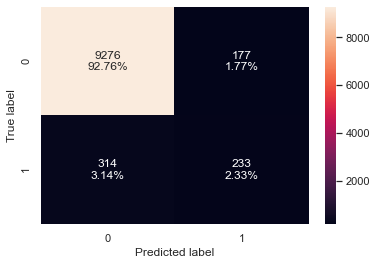

In [215]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

- The is a decrease in the performance of validation Minimum_Vs_Model_cost as compared to the result from cross-validation with default parameters.
- Let's see what the outcome of Randomized Seacrch will be

### RandomizedSearchCV

In [216]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(10,30, 50),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.05, 0.1,0.2],
            'gamma':[0,3,5],
            'subsample':[0.8,0.9],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 10, 'learning_rate': 0.2, 'gamma': 5} with CV score=0.8067073170731707:
CPU times: user 4.07 s, sys: 915 ms, total: 4.98 s
Wall time: 1min 32s


In [217]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=10,
    scale_pos_weight=5,
    gamma=5,
    subsample=0.9,
    learning_rate=0.2,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [218]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.953,0.455,0.589,0.513,0.496


In [219]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.951,0.426,0.568,0.487,0.484


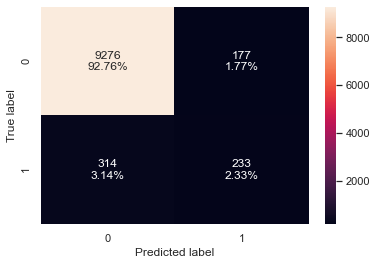

In [220]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

### Random Forest Classifier

### GridSearchCV 

In [221]:
%%time

# defining model 
rf_tuned = RandomForestClassifier(random_state=1)
                             
param_grid = { "n_estimators": [10,30,50], 
              "min_samples_leaf": np.arange(1, 3), 
              "max_features": ['sqrt','log2'], 
              "max_samples": np.arange(0.2, 0.6, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, param_grid, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

CPU times: user 12.1 s, sys: 565 ms, total: 12.7 s
Wall time: 1min 25s


RandomForestClassifier(max_features='sqrt', max_samples=0.5000000000000001,
                       n_estimators=50, random_state=1)

In [222]:
# building model with best parameters
rf_tuned1 = RandomForestClassifier(
    random_state=1,
    n_estimators=50,
    max_features='sqrt',
    max_samples=0.50,
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.5, n_estimators=50,
                       random_state=1)

In [223]:
# Calculating different metrics on train set
rf_grid_train = model_performance_classification_sklearn(
    rf_tuned1, X_train, y_train
)
print("Training performance:")
rf_grid_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.993,0.882,0.998,0.936,0.835


In [224]:
# Calculating different metrics on validation set
rf_grid_val = model_performance_classification_sklearn(rf_tuned1, X_val, y_val)
print("Validation performance:")
rf_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.985,0.731,0.988,0.840,0.689


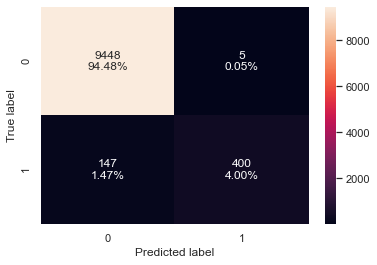

In [225]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned1, X_val, y_val)

### RandomizedSearchCV

In [226]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = { "n_estimators": [10,30,50], 
              "min_samples_leaf": np.arange(1, 3), 
              "max_features": ['sqrt','log2'], 
              "max_samples": np.arange(0.2, 0.6, 0.1)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
rf_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rf_tuned2.best_params_,rf_tuned2.best_score_))

Best parameters are {'n_estimators': 50, 'min_samples_leaf': 1, 'max_samples': 0.5000000000000001, 'max_features': 'sqrt'} with CV score=0.7323170731707317:
CPU times: user 6.56 s, sys: 599 ms, total: 7.16 s
Wall time: 1min 22s


In [227]:
# building model with best parameters
rf_tuned2 = RandomForestClassifier(
    random_state=1,
    n_estimators=50,
    max_features='sqrt',
    max_samples=0.50,
    min_samples_leaf=1,
)
# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.5, n_estimators=50,
                       random_state=1)

In [228]:
# Calculating different metrics on train set
rf_random_train = model_performance_classification_sklearn(
    rf_tuned2, X_train, y_train
)
print("Training performance:")
rf_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.993,0.882,0.998,0.936,0.835


In [229]:
# Calculating different metrics on validation set
rf_random_val = model_performance_classification_sklearn(rf_tuned2, X_val, y_val)
print("Validation performance:")
rf_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.985,0.731,0.988,0.840,0.689


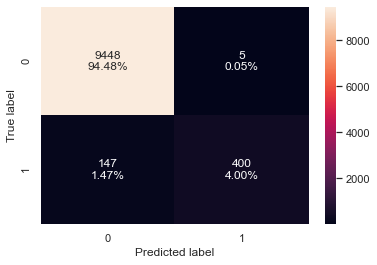

In [230]:
# creating confusion matrix
confusion_matrix_sklearn(rf_tuned2, X_val, y_val)

## Bagging Classifier

### GridSearch CV

In [232]:
%%time 

#defining model
model = BaggingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
param_grid = {'max_samples': [0.8,0.9], 
              'max_features': [0.8,0.9],
              'n_estimators' : [10,30],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters are {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 30} with CV score=0.7554878048780489:
CPU times: user 38.9 s, sys: 211 ms, total: 39.1 s
Wall time: 2min 55s


In [233]:
# building model with best parameters
bagging_tuned1 = BaggingClassifier(
    max_features= 0.8, 
    max_samples= 0.9, 
    n_estimators= 50,
)

# Fit the model on training data
bagging_tuned1.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50)

In [234]:
# Calculating different metrics on train set
bagging_grid_train = model_performance_classification_sklearn(
    bagging_tuned1, X_train, y_train
)
print("Training performance:")
bagging_grid_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.999,0.988,1.000,0.994,0.981


In [237]:
# Calculating different metrics on validation set
bagging_grid_val = model_performance_classification_sklearn(bagging_tuned1, X_val, y_val)
print("Validation performance:")
bagging_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.986,0.764,0.984,0.860,0.716


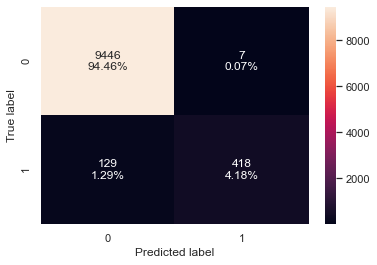

In [236]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned1, X_val, y_val)

### RandomizedSearch CV

In [238]:
%%time

# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {'max_samples': [0.8,0.9], 
              'max_features': [0.8,0.9],
              'n_estimators' : [40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
bagging_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
bagging_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(bagging_tuned2.best_params_,bagging_tuned2.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.7579268292682928:
CPU times: user 56.1 s, sys: 365 ms, total: 56.5 s
Wall time: 5min 57s


In [239]:
# building model with best parameters
bagging_tuned2 = BaggingClassifier(
    n_estimators= 50, 
    max_samples= 0.9, 
    max_features= 0.8,
)
# Fit the model on training data
bagging_tuned2.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=50)

In [240]:
# Calculating different metrics on train set
bagging_random_train = model_performance_classification_sklearn(
    bagging_tuned2, X_train, y_train
)
print("Training performance:")
bagging_random_train

Training performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.999,0.988,0.999,0.994,0.981


In [241]:
# Calculating different metrics on validation set
bagging_random_val = model_performance_classification_sklearn(bagging_tuned2, X_val, y_val)
print("Validation performance:")
bagging_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.986,0.764,0.984,0.860,0.716


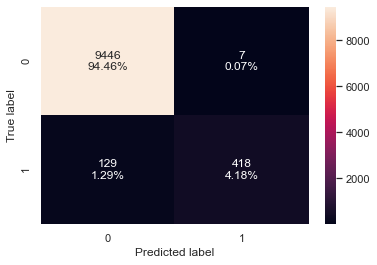

In [242]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_tuned2, X_val, y_val)

## Model Performance comparison and choosing the final model

In [243]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgboost_grid_train.T,
        xgboost_random_train.T,
        rf_grid_train.T,
        rf_random_train.T,
        bagging_grid_train.T,
        bagging_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
    "Random Forest Tuned with Grid search",
    "Random Forest Tuned with Random search",
    "Bagging Classifier with Grid Search",
    "Bagging Classifier with Random search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search,Random Forest Tuned with Grid search,Random Forest Tuned with Random search,Bagging Classifier with Grid Search,Bagging Classifier with Random search
Accuracy,0.953,0.953,0.993,0.993,0.999,0.999
Recall,0.455,0.455,0.882,0.882,0.988,0.988
Precision,0.589,0.589,0.998,0.998,1.000,0.999
F1,0.513,0.513,0.936,0.936,0.994,0.994
Minimum_Vs_Model_cost,0.496,0.496,0.835,0.835,0.981,0.981


In [244]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
       xgboost_grid_val.T,
        xgboost_random_val.T,
        rf_grid_val.T,
        rf_random_val.T,
        bagging_grid_val.T,
        bagging_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
    "Random Forest Tuned with Grid search",
    "Random Forest Tuned with Random search",
    "Bagging Classifier with Grid Search",
    "Bagging Classifier with Random search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search,Random Forest Tuned with Grid search,Random Forest Tuned with Random search,Bagging Classifier with Grid Search,Bagging Classifier with Random search
Accuracy,0.951,0.951,0.985,0.985,0.986,0.986
Recall,0.426,0.426,0.731,0.731,0.764,0.764
Precision,0.568,0.568,0.988,0.988,0.984,0.984
F1,0.487,0.487,0.840,0.840,0.860,0.860
Minimum_Vs_Model_cost,0.484,0.484,0.689,0.689,0.716,0.716


- Bagging Classifier with Grid search has the higest validation of Minimum_Vs_Model_cost. 
- This will be our model for the test data

## Test set final performance

In [245]:
# Define X and Y variables in the test set
X_test= ReneWind_Test.drop(["Target"], axis=1)
Y_test = ReneWind_Test["Target"]

In [246]:
print(X_test.shape, Y_test.shape)

(10000, 40) (10000,)


In [ ]:
# Calculating different metrics on test set
bagging_grid_test = model_performance_classification_sklearn(
    bagging_tuned1, X_test, Y_test
)
print("Training performance:")
bagging_grid_test

## Pipelines to build the final model


# Business Insights and Conclusions